In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("datasets/dataset.csv")
df.head()

X Acceleration            .1  X Velocity        .2  .3  X Displacement  \
0        0.000000  0.131892        0.000000 -1.586201            0.000000   
1        0.152904  0.045222        0.152904 -1.576315            0.152904   
2        0.305808  0.024958        0.305808 -1.659724            0.305808   
3        0.458711  0.033992        0.458711 -1.764229            0.458711   
4        0.611615  0.027888        0.611615 -1.876761            0.611615   

         .4  .5  Y Acceleration  ...   .11 Z Acceleration       .12   .13  \
0  3.988780            0.000000  ...             0.000000 -0.193176         
1  3.919439            0.152904  ...             0.152904  0.001648         
2  3.839093            0.305808  ...             0.305808  0.218201         
3  3.737762            0.458711  ...             0.458711  0.322205         
4  3.612186            0.611615  ...             0.611615  0.223572         

  Z Velocity       .14   .15 Z Displacement       .16      
0   0.000000 -0.661543             0.000000 -0.740339      
1   0.152904 -0.781783             0.152904 -0.922177      
2   0.305808 -0.589053             0.305808 -1.098338      
3   0.458711 -0.150842             0.458711 -1.225647      
4   0.611615  0.297079             0.611615 -1.284068      

[5 rows x 27 columns]

In [4]:
# df = df.drop([df.columns[2], df.columns[3], df.columns], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   X Acceleration  4096 non-null   float64
 1                   4096 non-null   float64
 2    .1             4096 non-null   object 
 3   X Velocity      4096 non-null   float64
 4    .2             4096 non-null   float64
 5    .3             4096 non-null   object 
 6   X Displacement  4096 non-null   float64
 7    .4             4096 non-null   float64
 8    .5             4096 non-null   object 
 9   Y Acceleration  4096 non-null   float64
 10   .6             4096 non-null   float64
 11   .7             4096 non-null   object 
 12  Y Velocity      4096 non-null   float64
 13   .8             4096 non-null   float64
 14   .9             4096 non-null   object 
 15  Y Displacement  4096 non-null   float64
 16   .10            4096 non-null   float64
 17   .11            4096 non-null   o

In [5]:
df.columns

Index(['X Acceleration', ' ', ' .1', 'X Velocity', ' .2', ' .3',
       'X Displacement', ' .4', ' .5', 'Y Acceleration', ' .6', ' .7',
       'Y Velocity', ' .8', ' .9', 'Y Displacement', ' .10', ' .11',
       'Z Acceleration', ' .12', ' .13', 'Z Velocity', ' .14', ' .15',
       'Z Displacement', ' .16', '  '],
      dtype='object')

In [6]:
for col in df.columns:
    if df[col].dtypes != float:
        df = df.drop(col, axis=1)

for col in df.columns[::2][1:]:
    df = df.drop(col, axis=1)

df = df.rename(columns={'X Acceleration': 'timestamp', ' ': 'X Acceleration', ' .2': 'X Velocity',
                   ' .4': 'X Displacement', ' .6': 'Y Acceleration', ' .8': 'Y Velocity', ' .10': 'Y Displacement',
                   ' .12': 'Z Acceleration', ' .14': 'Z Velocity', ' .16': 'Z Displacement',})

In [151]:
df.head()

timestamp  X Acceleration  X Velocity  X Displacement  Y Acceleration  \
0   0.000000        0.131892   -1.586201        3.988780        0.214880   
1   0.152904        0.045222   -1.576315        3.919439        0.232702   
2   0.305808        0.024958   -1.659724        3.839093        0.192663   
3   0.458711        0.033992   -1.764229        3.737762        0.113317   
4   0.611615        0.027888   -1.876761        3.612186        0.125768   

   Y Velocity  Y Displacement  Z Acceleration  Z Velocity  Z Displacement  
0   -4.497345        7.087320       -0.193176   -0.661543       -0.740339  
1   -4.401917        6.566415        0.001648   -0.781783       -0.922177  
2   -4.323089        6.044813        0.218201   -0.589053       -1.098338  
3   -4.334558        5.515150        0.322205   -0.150842       -1.225647  
4   -4.399117        4.966913        0.223572    0.297079       -1.284068

In [7]:
df.describe()

timestamp  X Acceleration   X Velocity  X Displacement  \
count  4096.000000     4096.000000  4096.000000     4096.000000   
mean    313.070548        0.000057    -0.002033        0.005246   
std     180.817573        0.402477     3.055279        2.686497   
min       0.000000       -1.028020   -11.016214       -9.892971   
25%     156.535274       -0.300237    -1.501493       -1.339997   
50%     313.070548       -0.030950     0.650818       -0.074829   
75%     469.605822        0.238154     1.961902        1.750843   
max     626.141096        1.286677     7.970604        6.486175   

       Y Acceleration   Y Velocity  Y Displacement  Z Acceleration  \
count    4.096000e+03  4096.000000     4096.000000    4.096000e+03   
mean     6.298816e-12     0.001735        0.011415   -3.188477e-11   
std      3.963194e-01     3.233989        3.139820    1.982243e-01   
min     -1.877161e+00   -10.578935       -4.885255   -9.295044e-01   
25%     -1.198370e-01    -1.367514       -1.682867   -1.157837e-01   
50%      5.228215e-02     0.225798       -0.575562    8.605957e-03   
75%      2.126825e-01     1.344212        0.647034    1.310425e-01   
max      9.021357e-01     9.729161       13.213992    7.318726e-01   

        Z Velocity  Z Displacement  
count  4096.000000     4096.000000  
mean     -0.000039       -0.002223  
std       1.366364        1.280401  
min      -4.425030       -3.194439  
25%      -0.805004       -0.717109  
50%      -0.228640        0.016272  
75%       0.669195        0.608445  
max       5.875029        5.202558

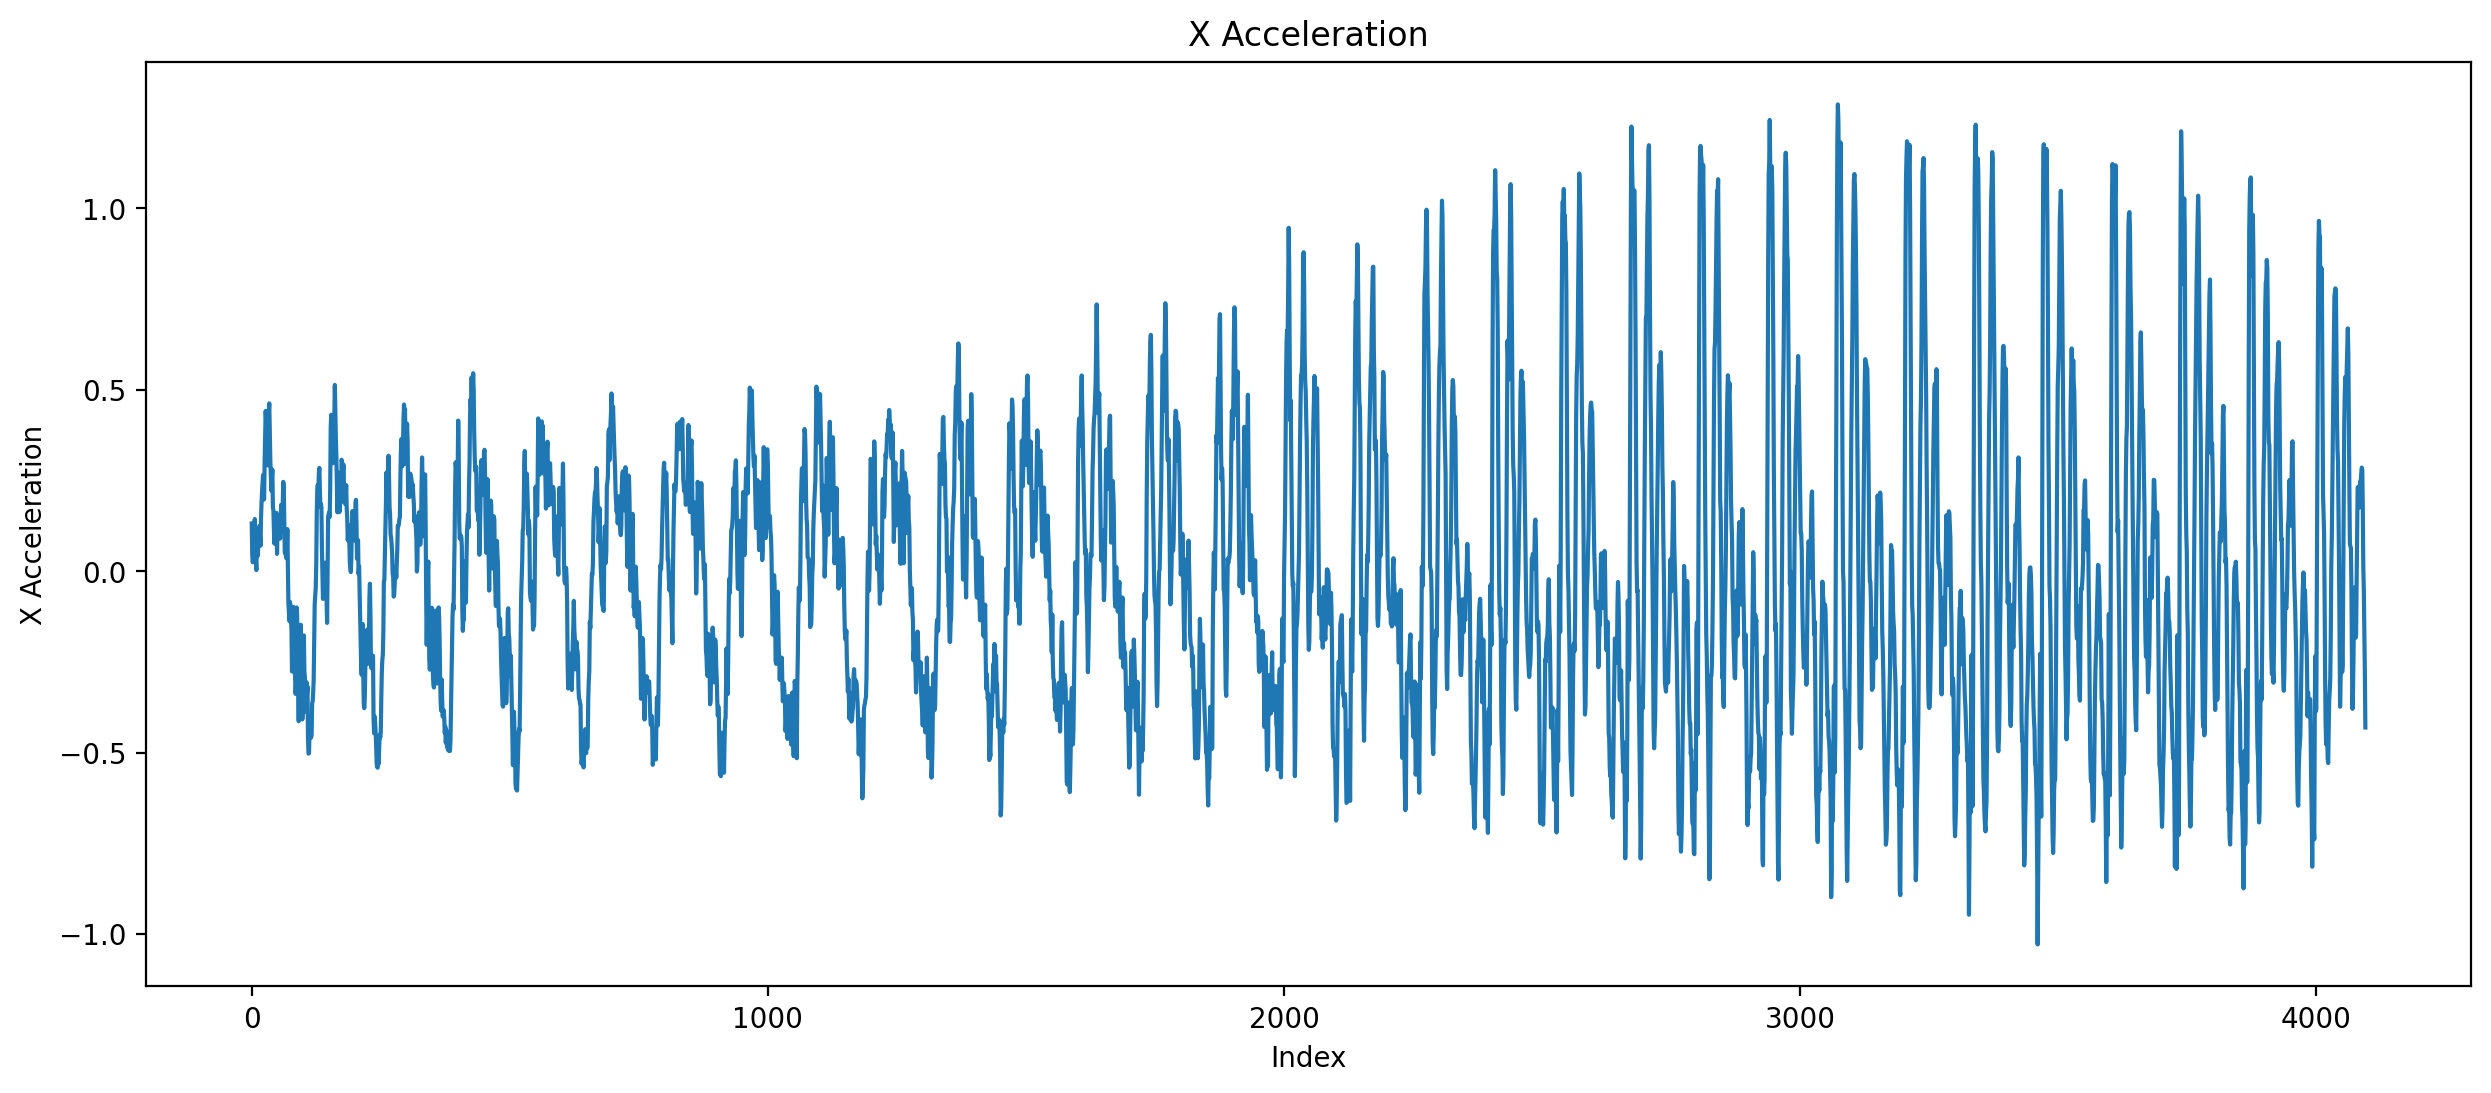

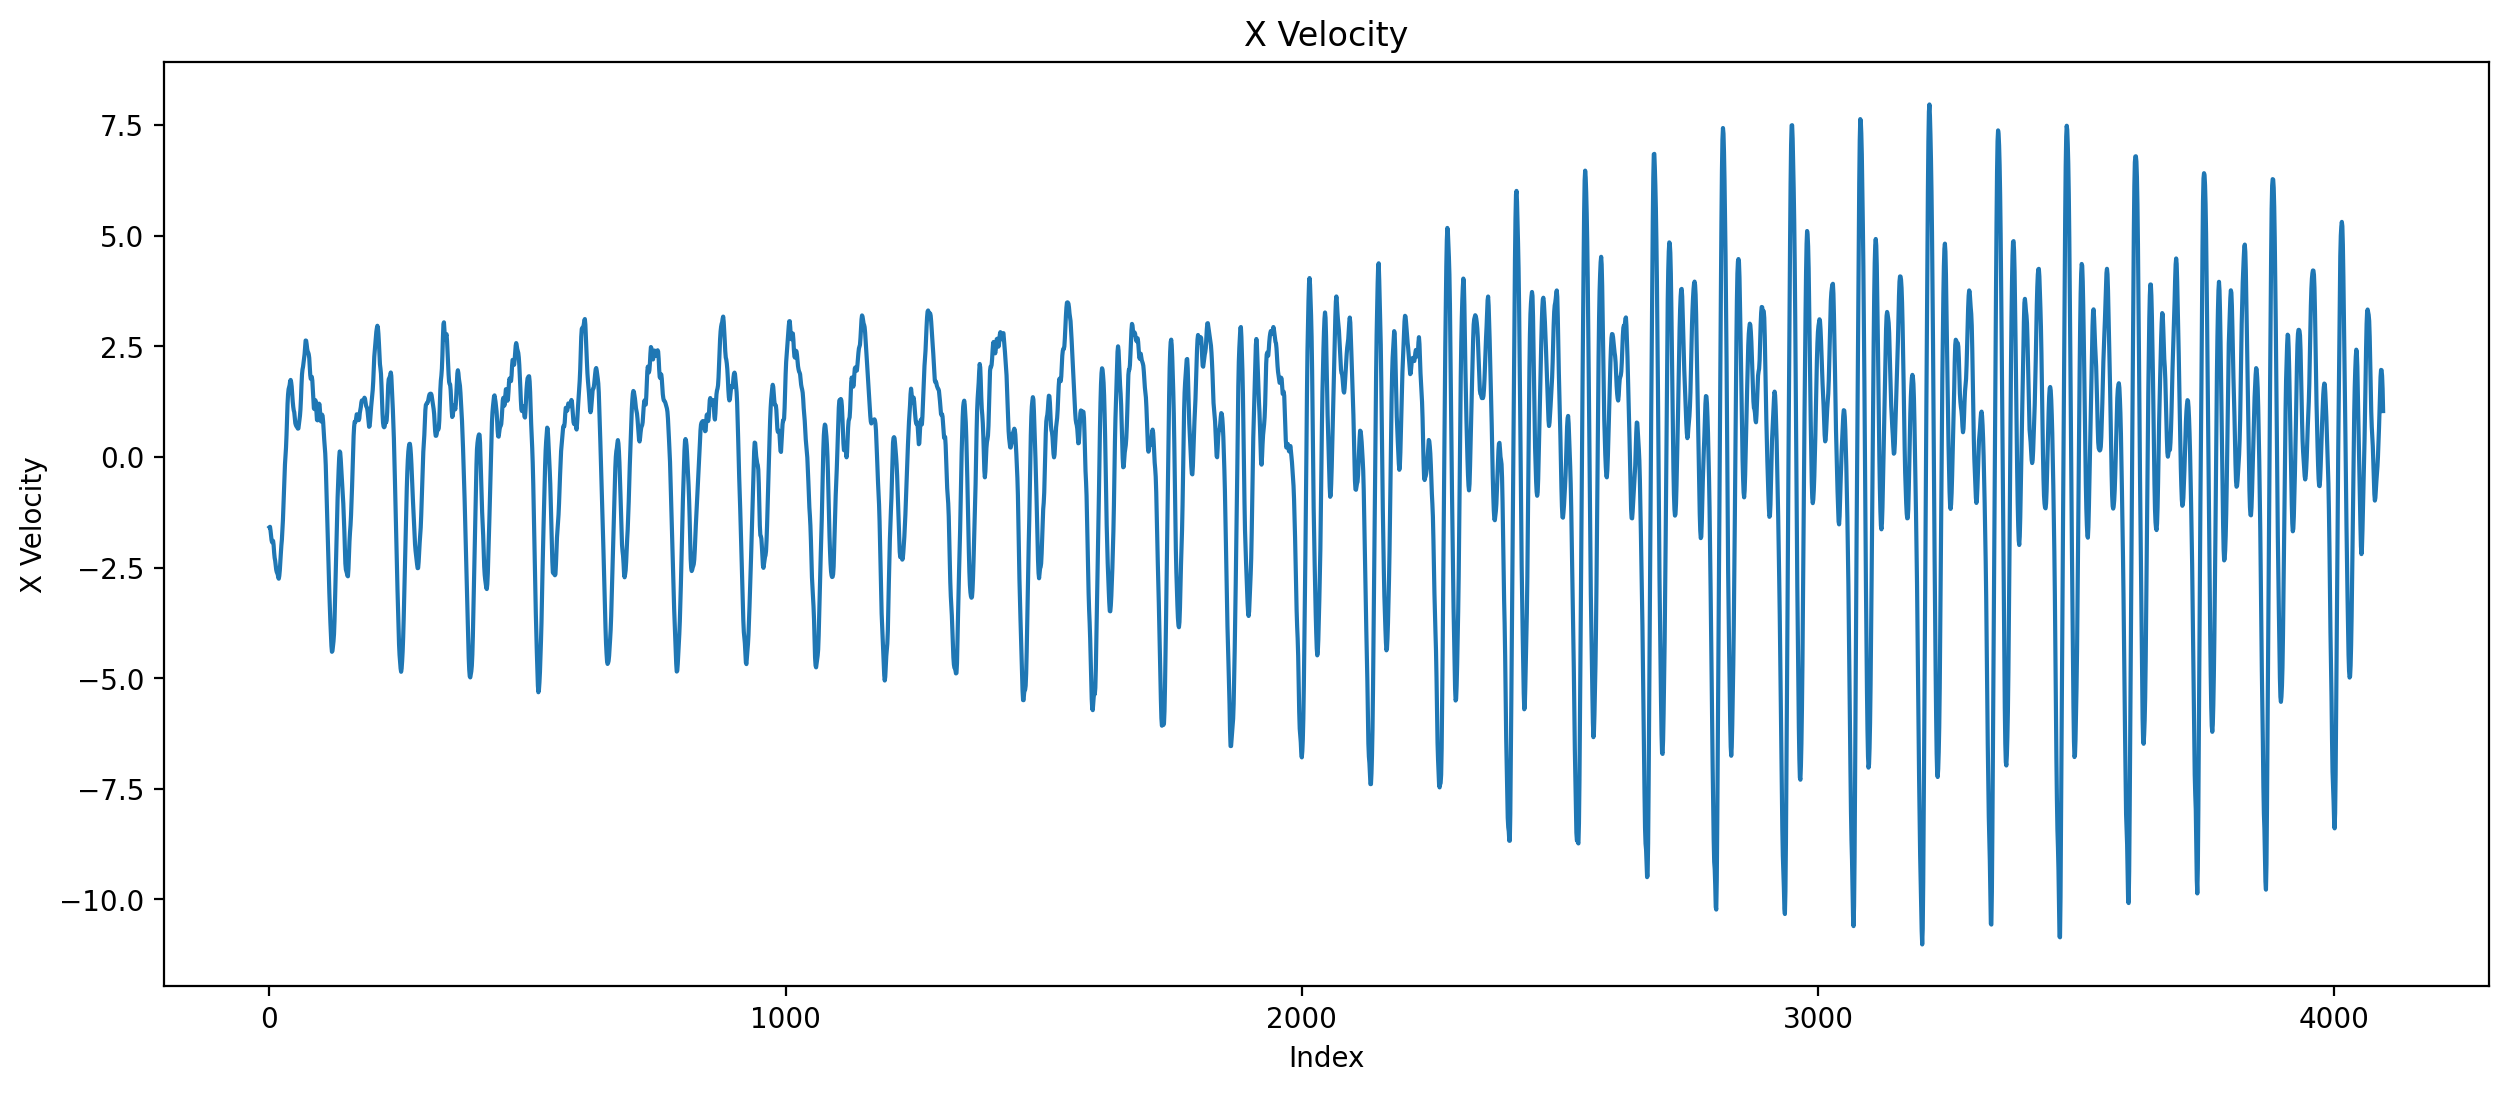

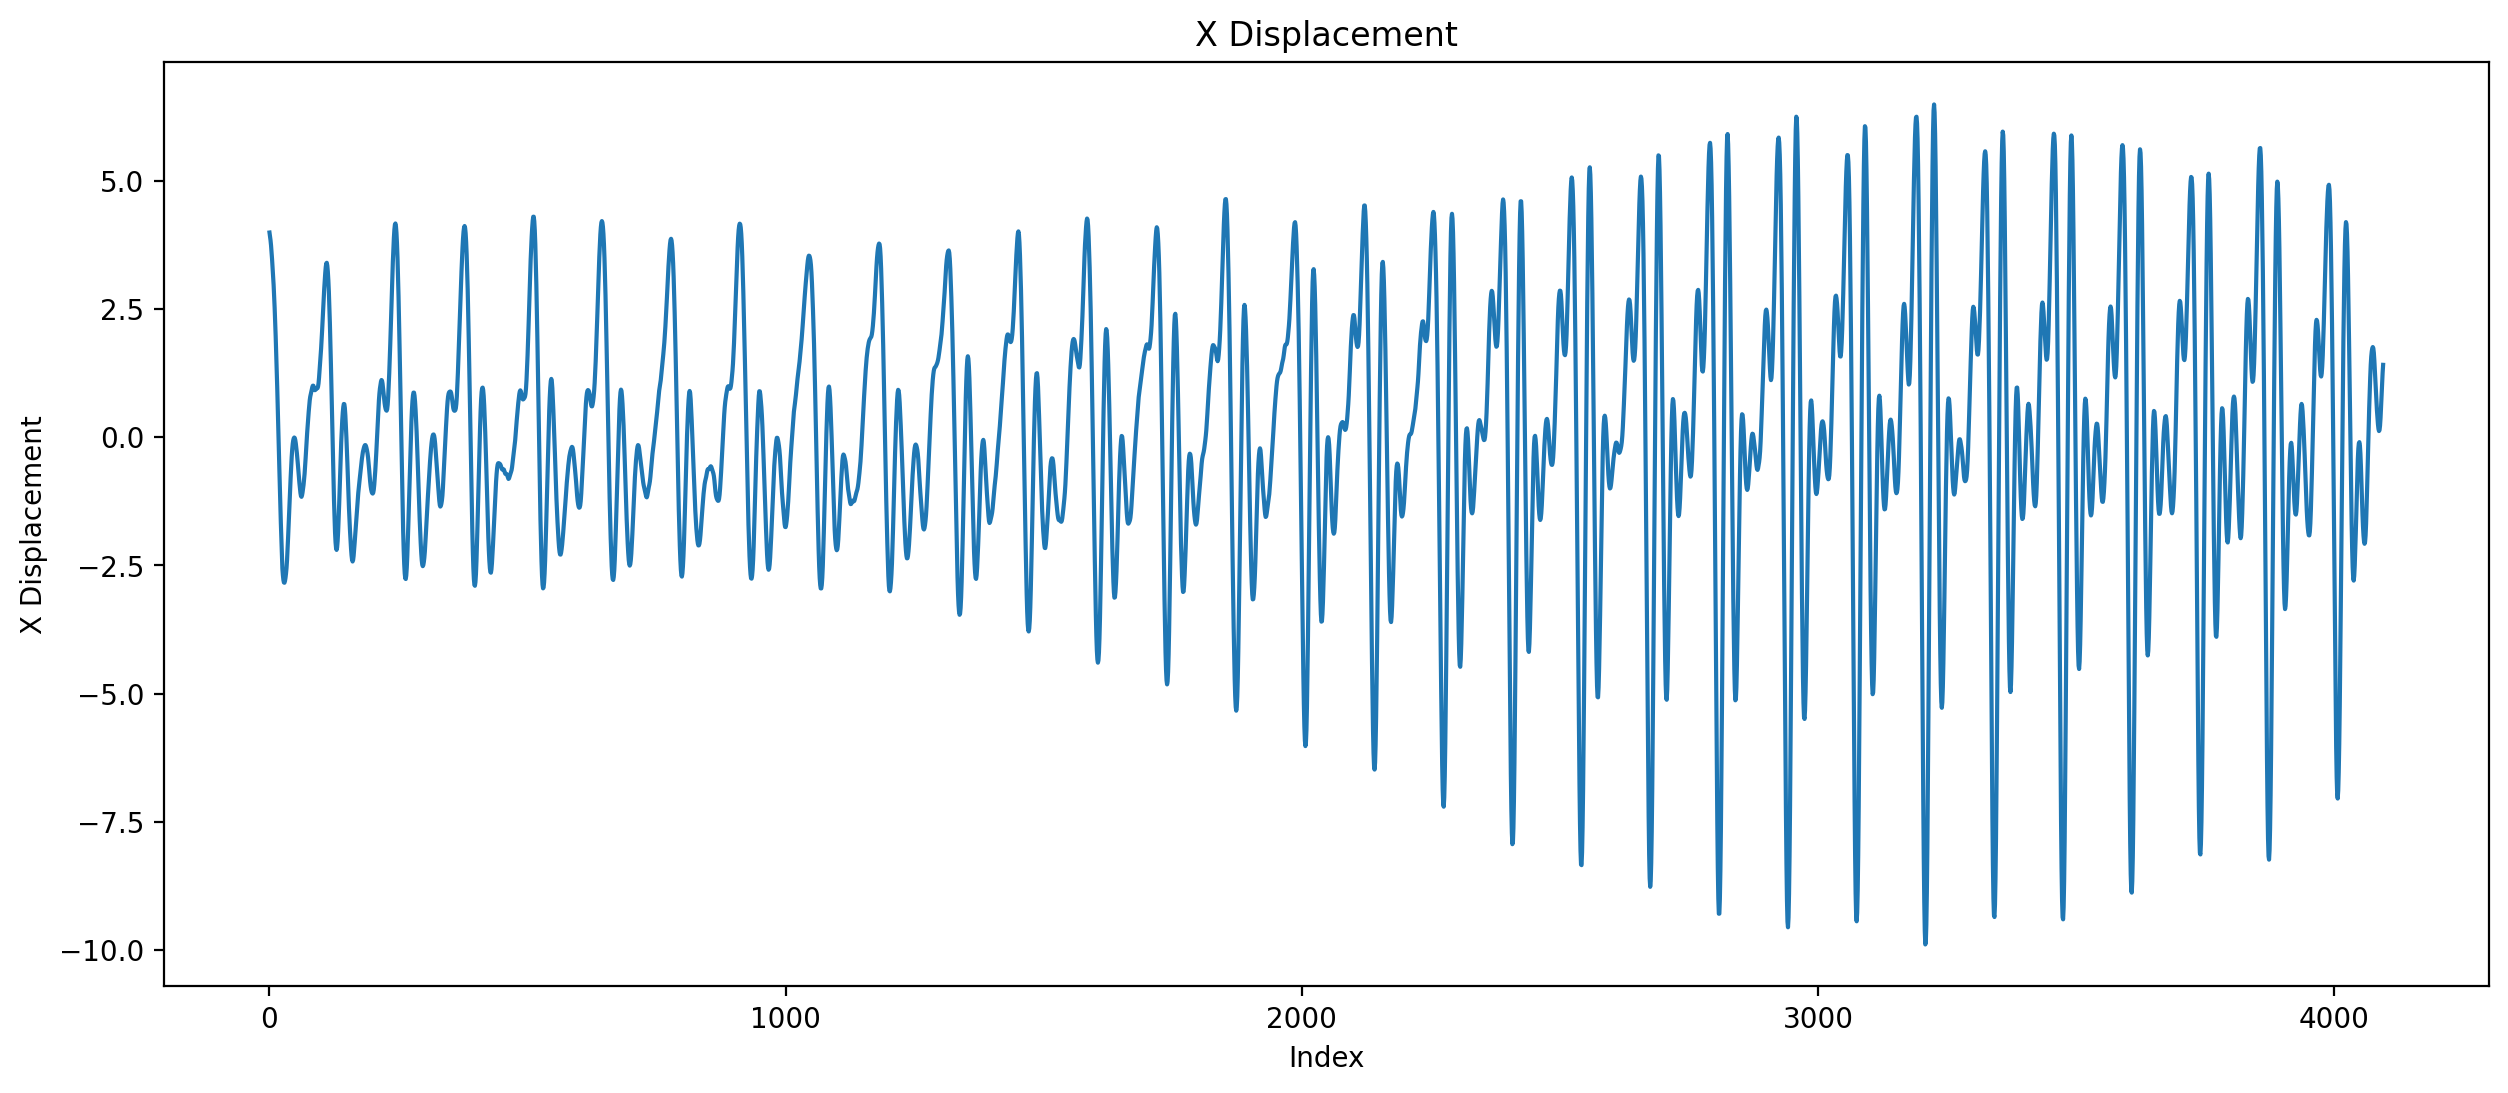

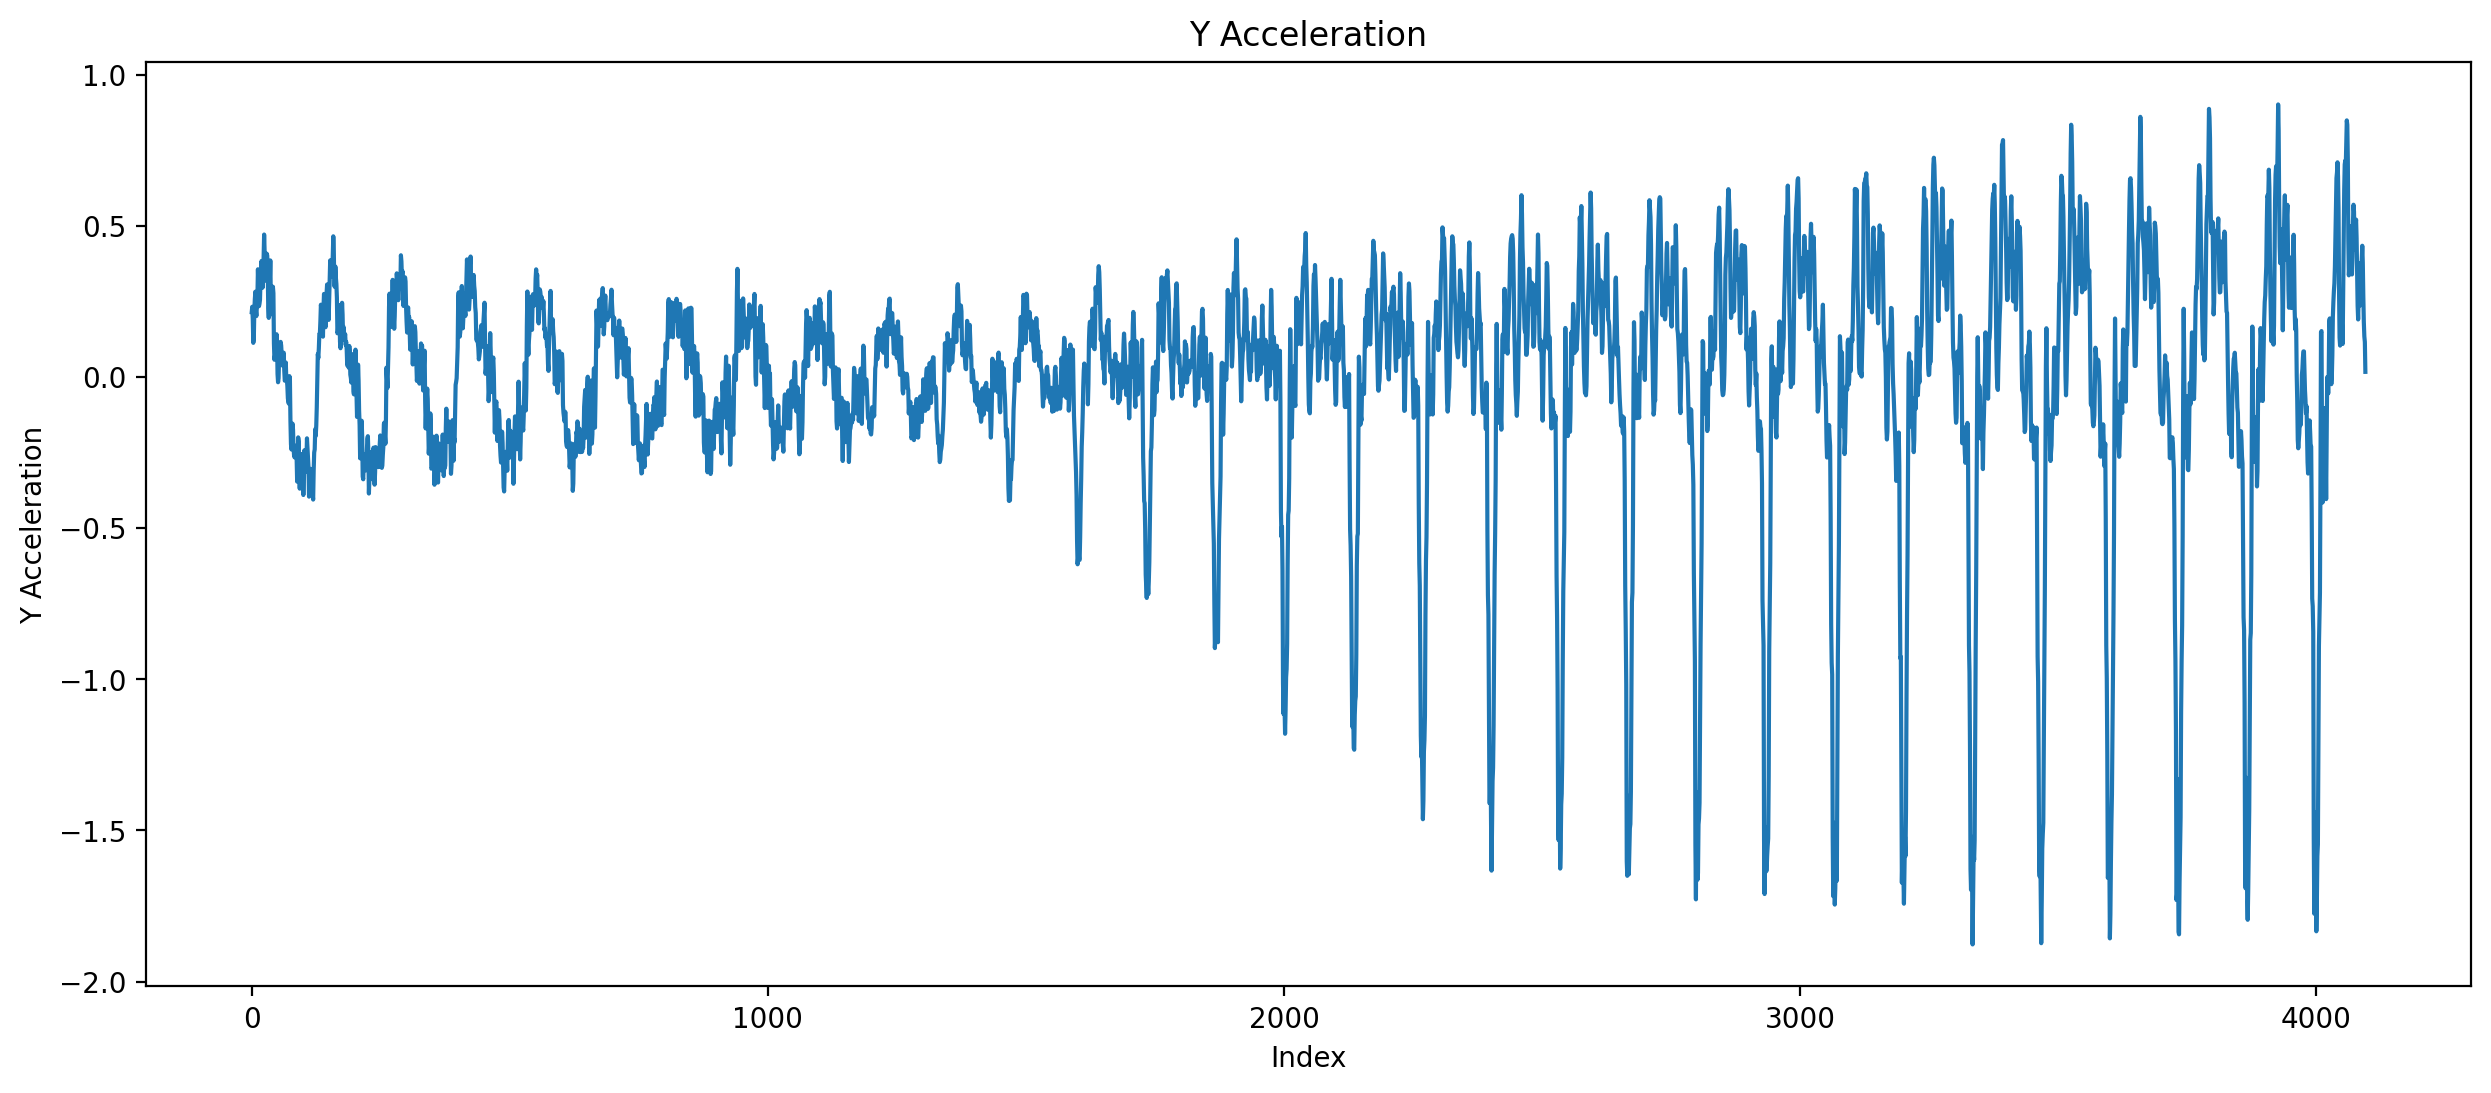

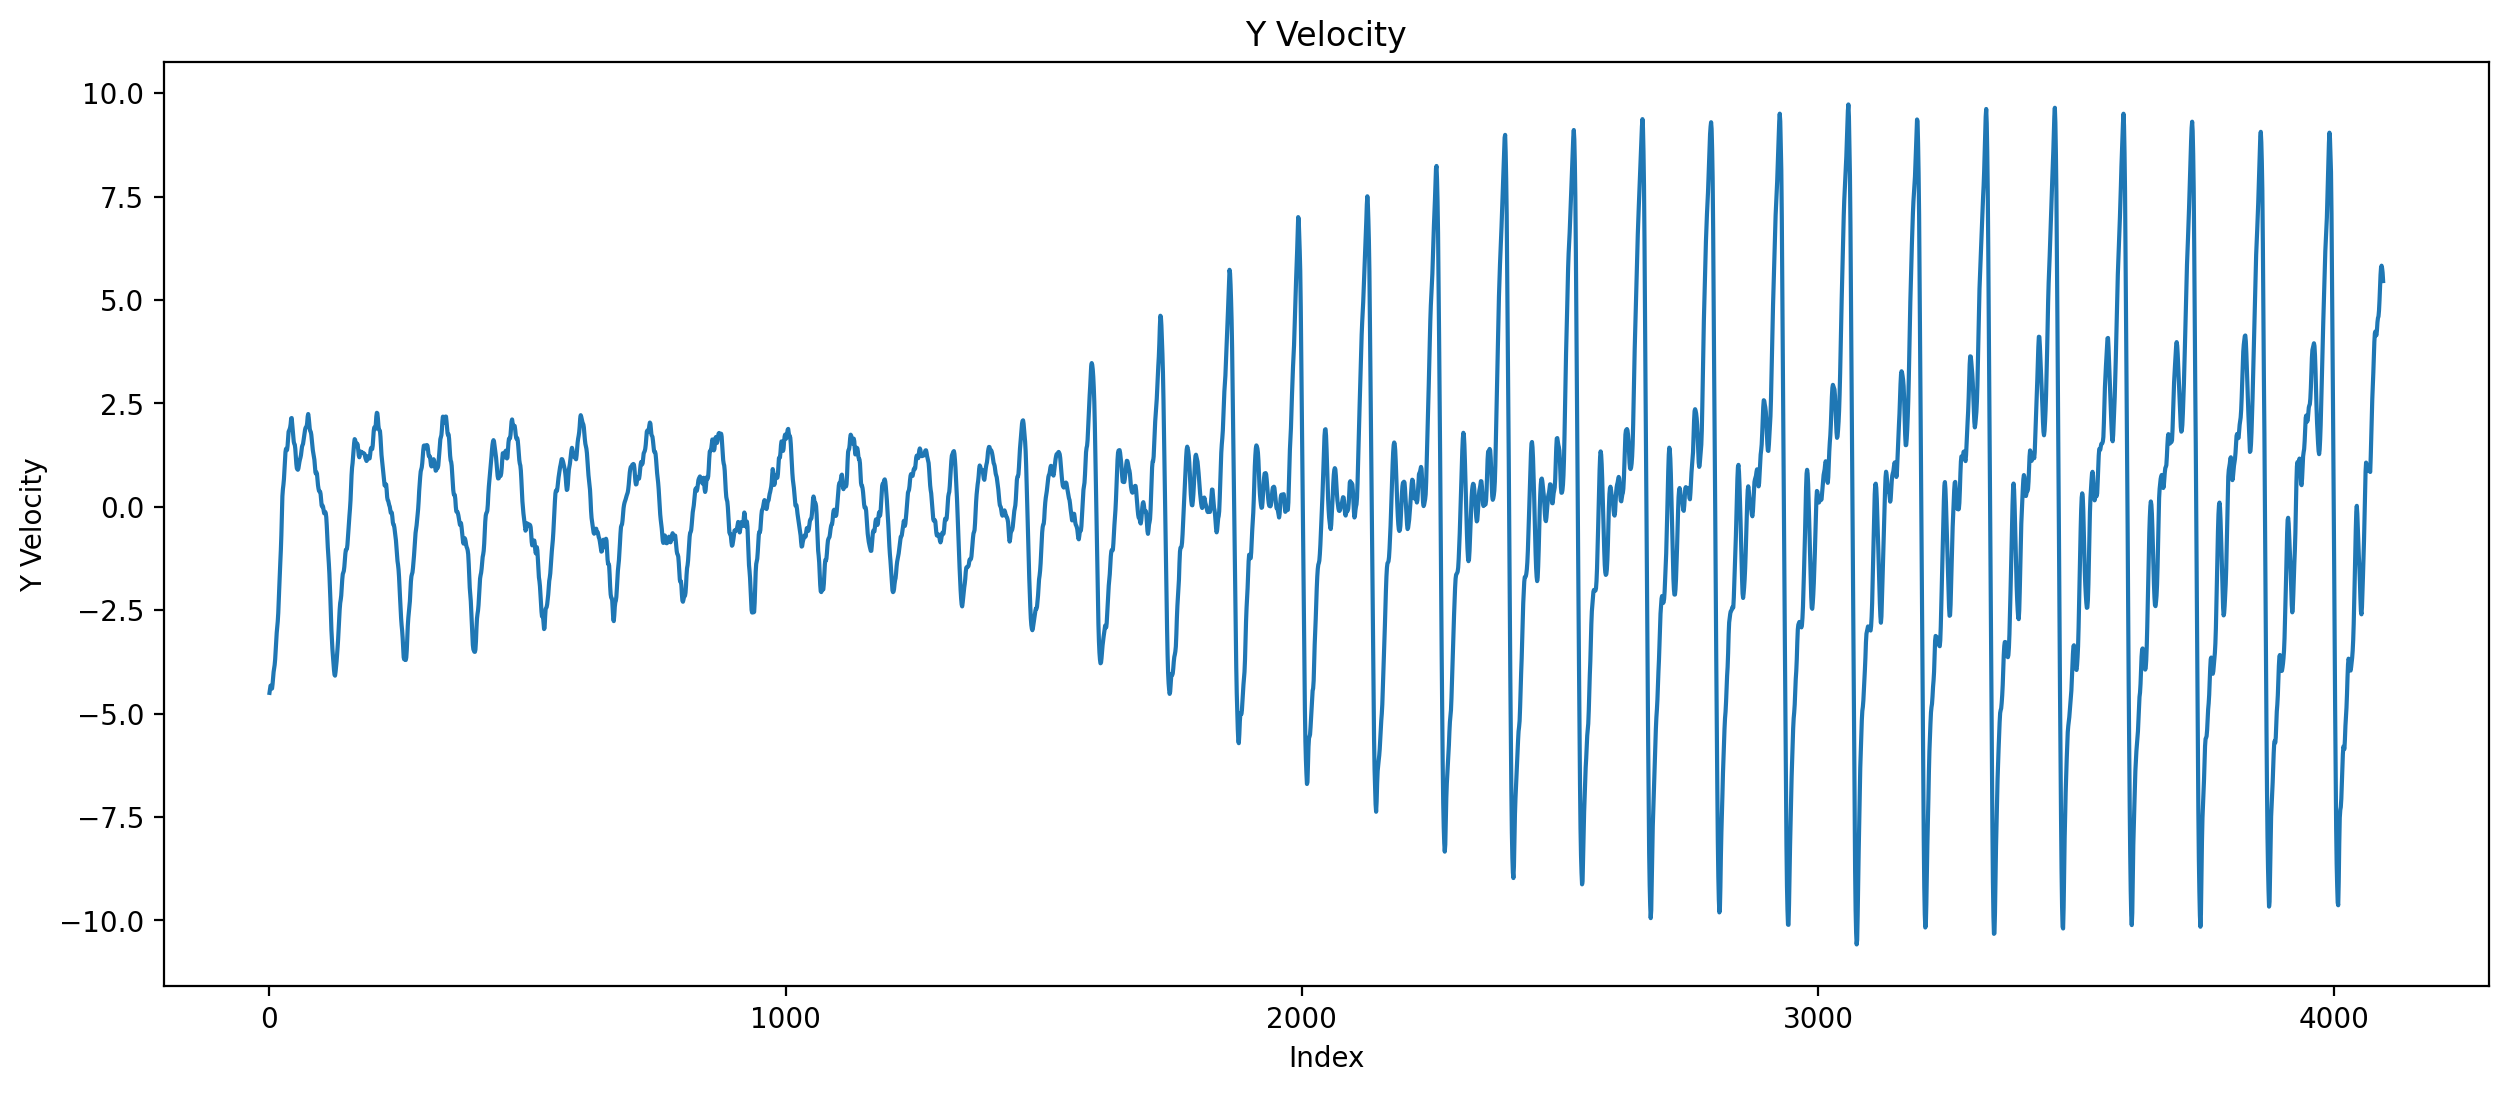

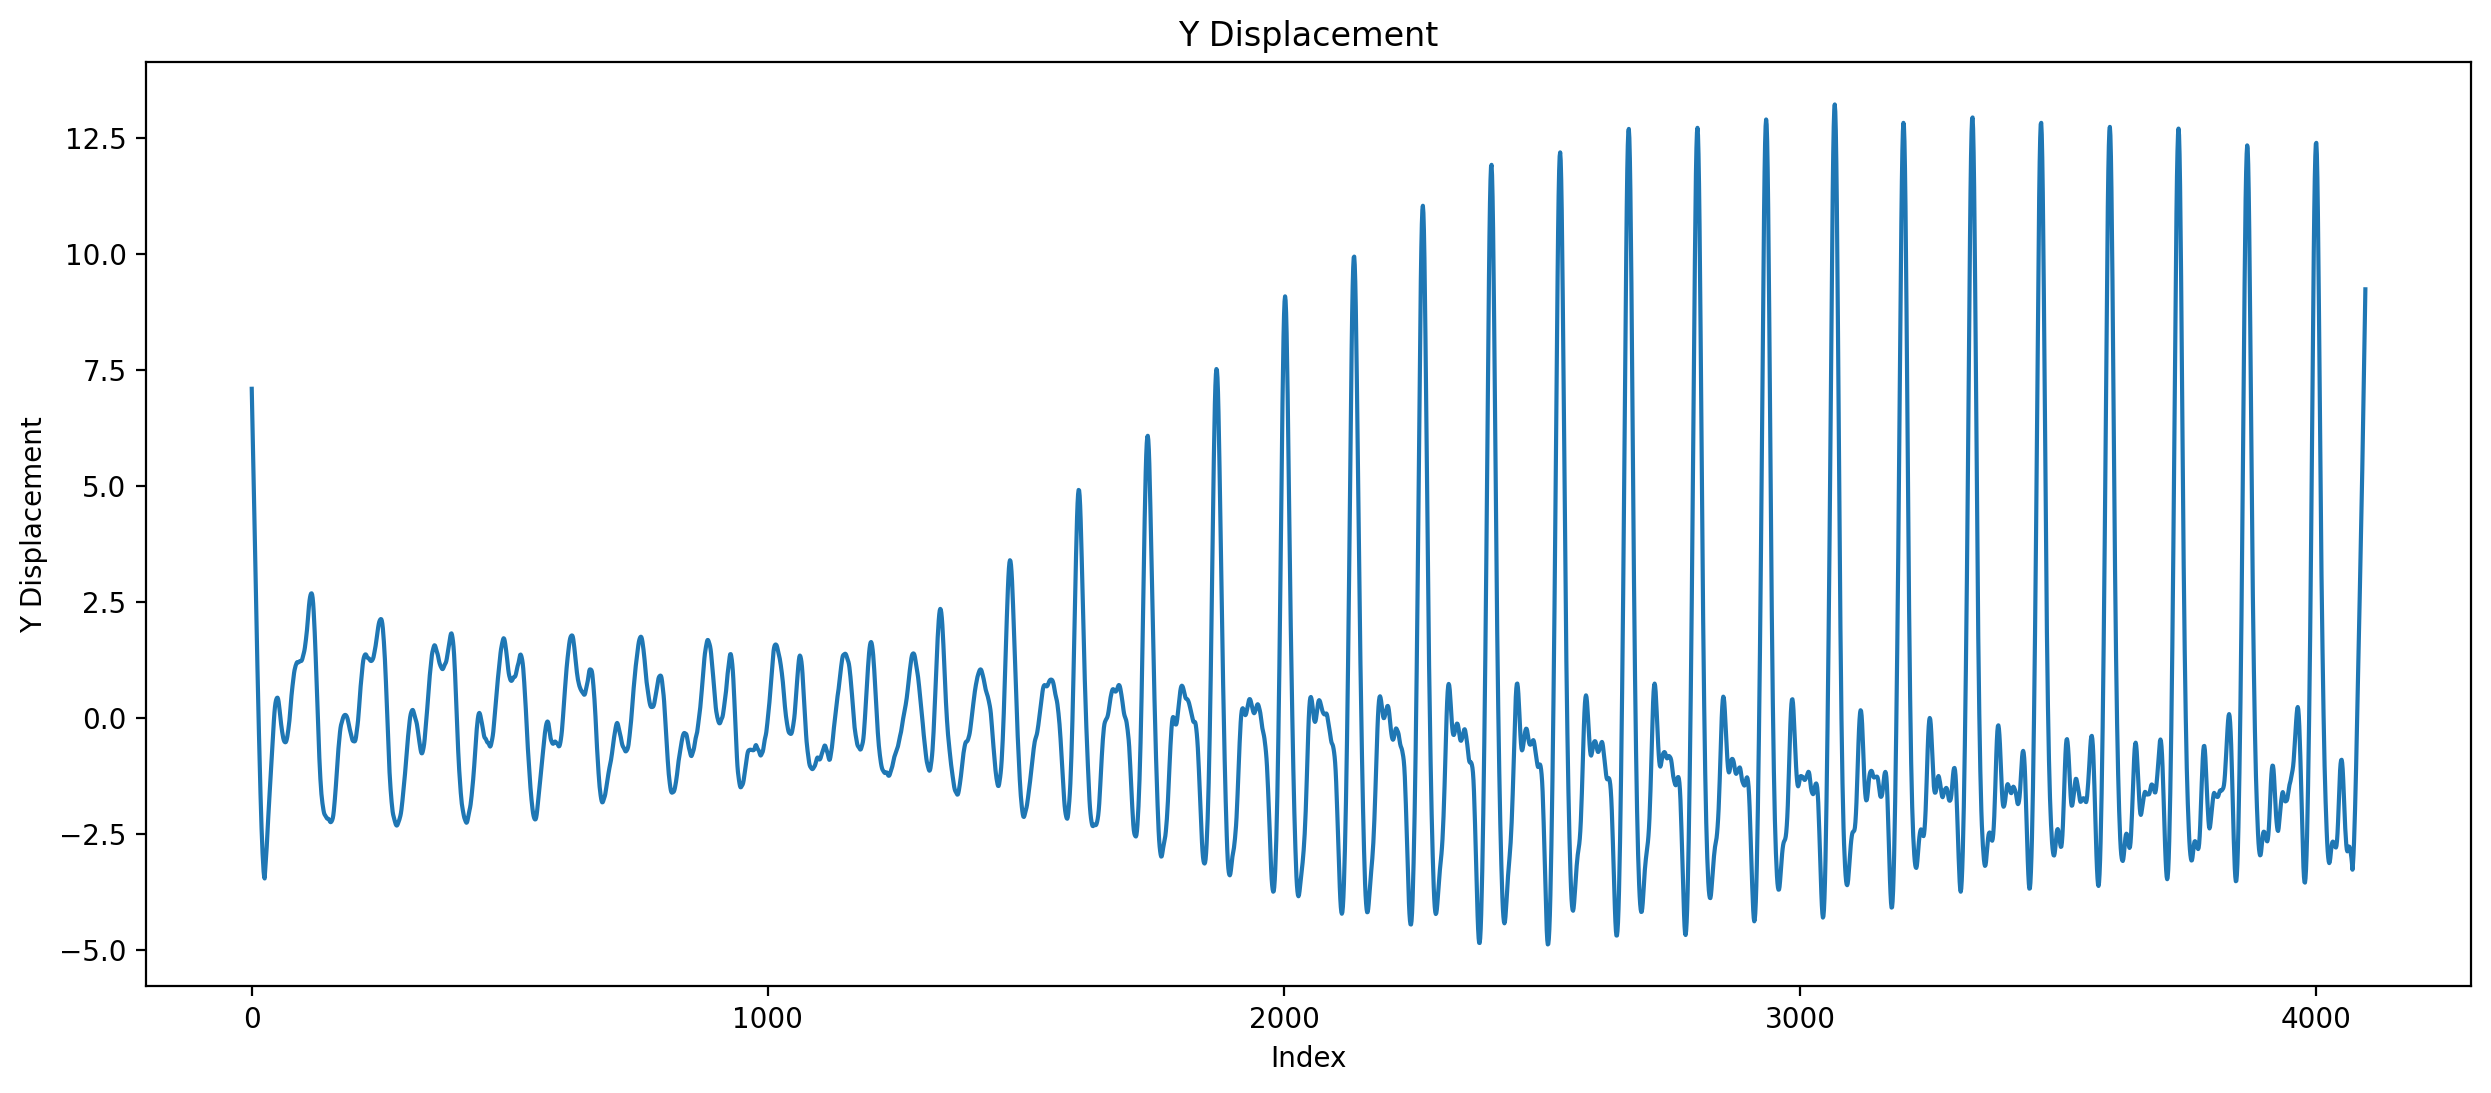

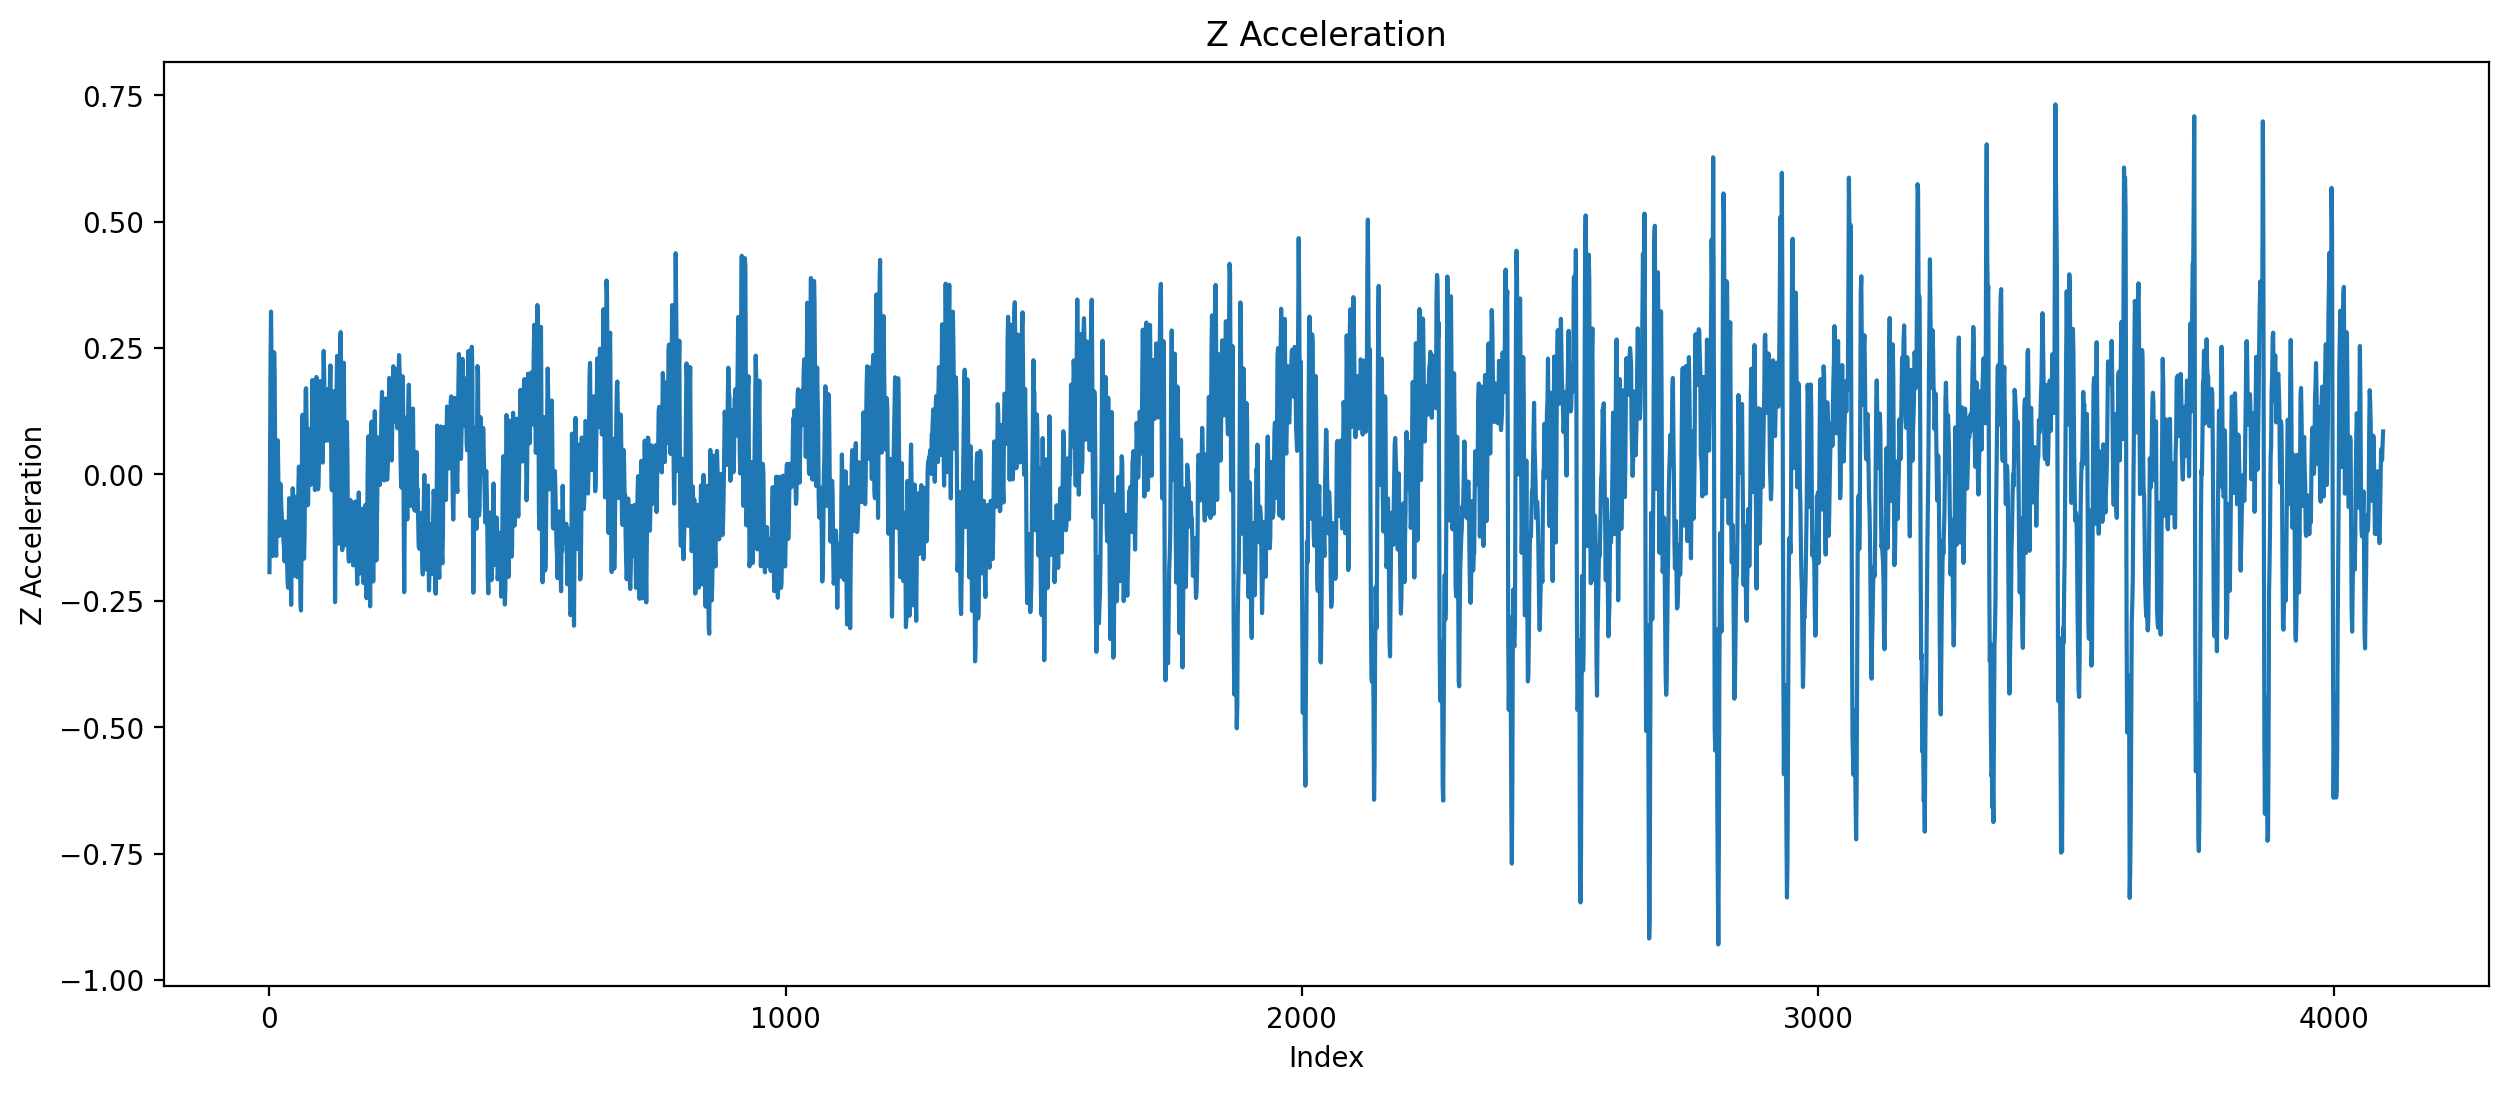

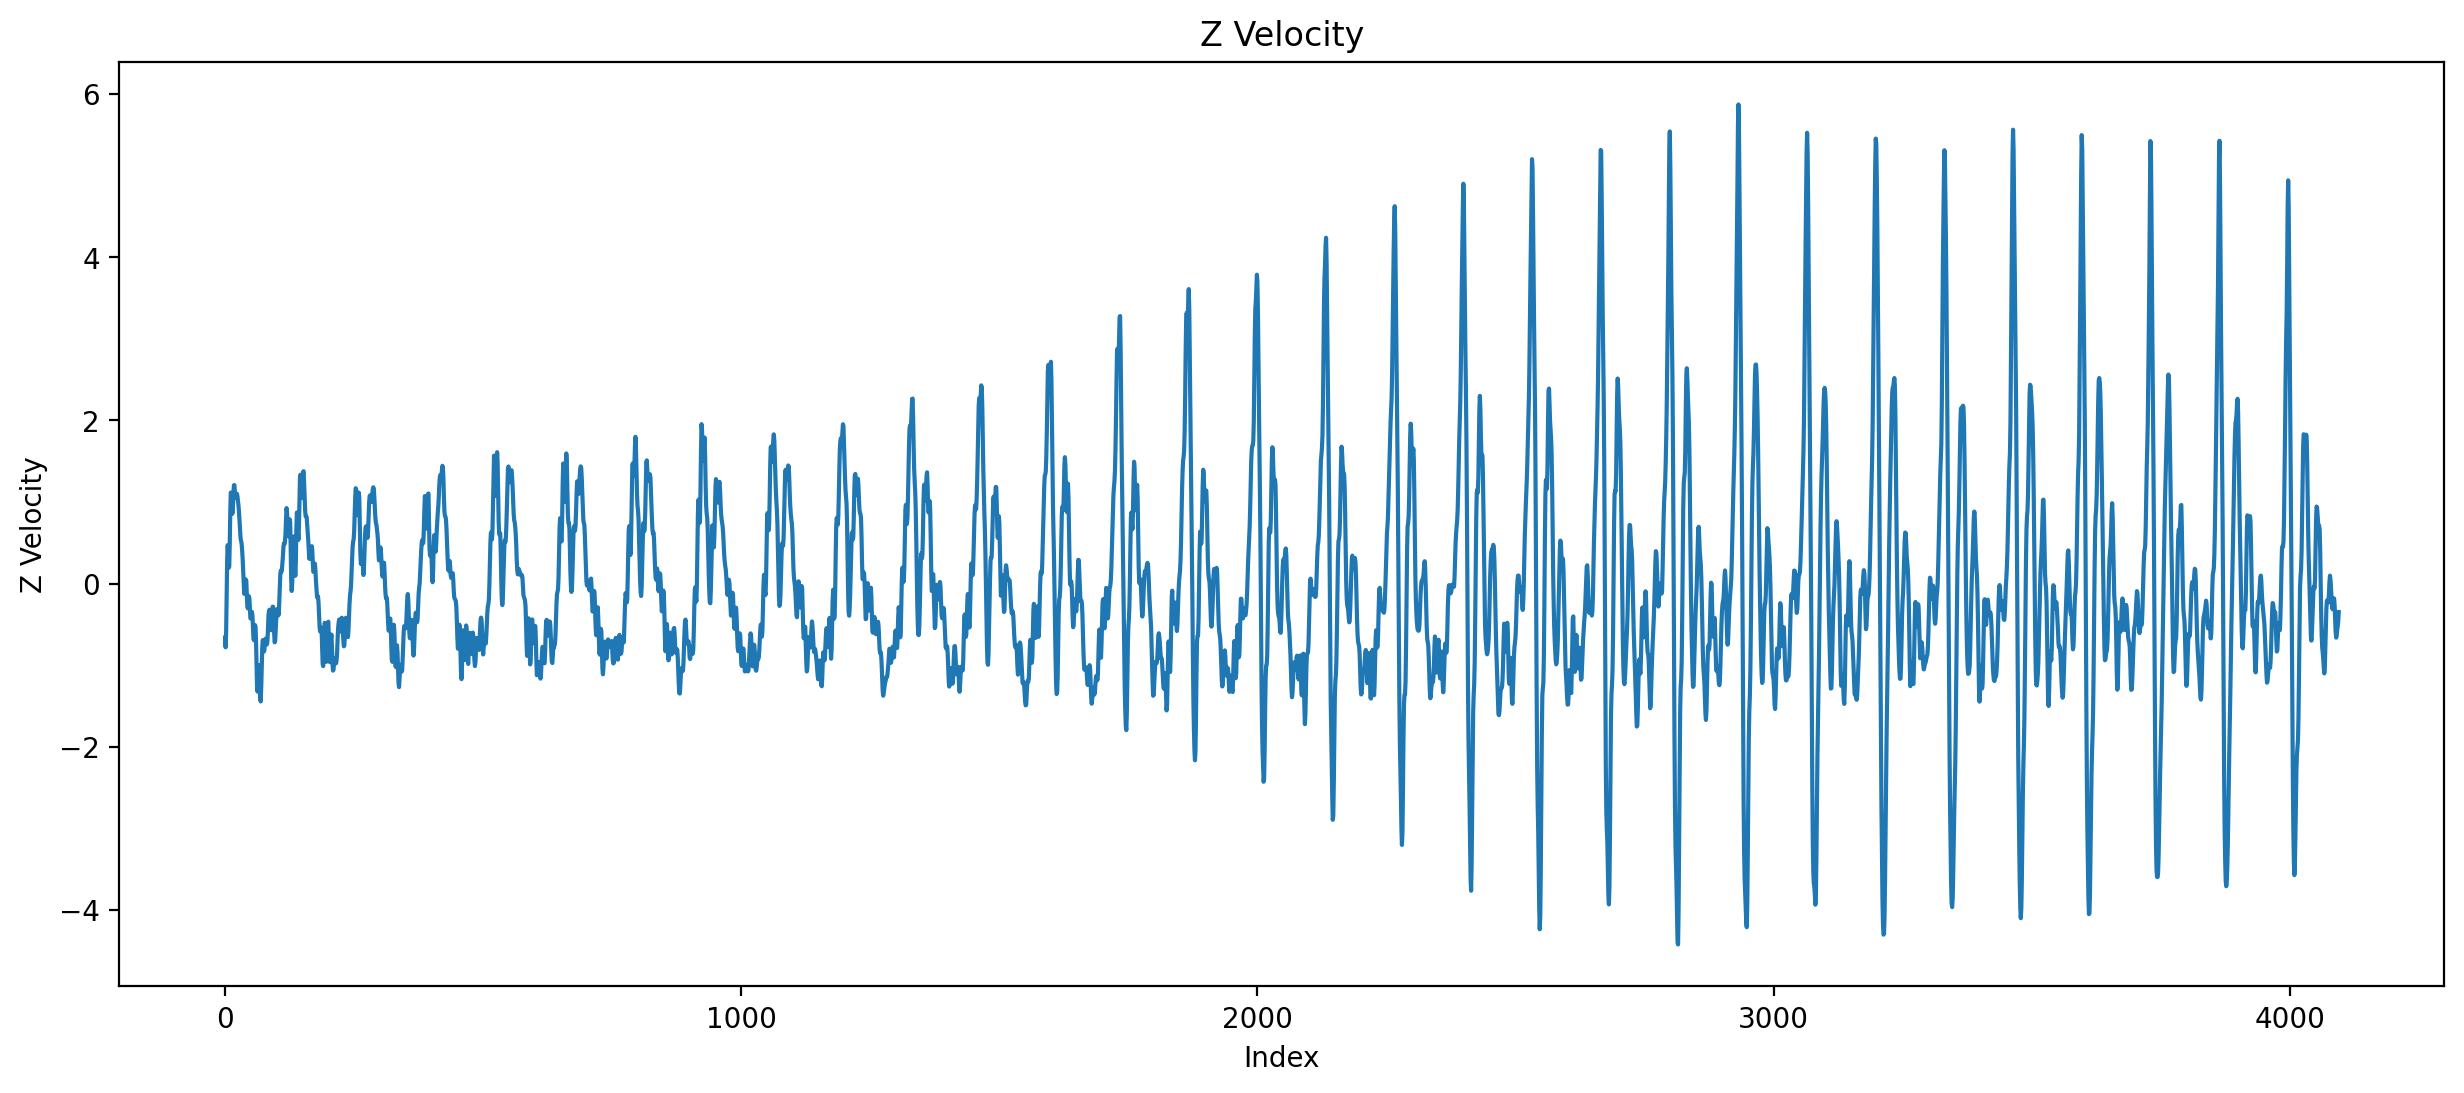

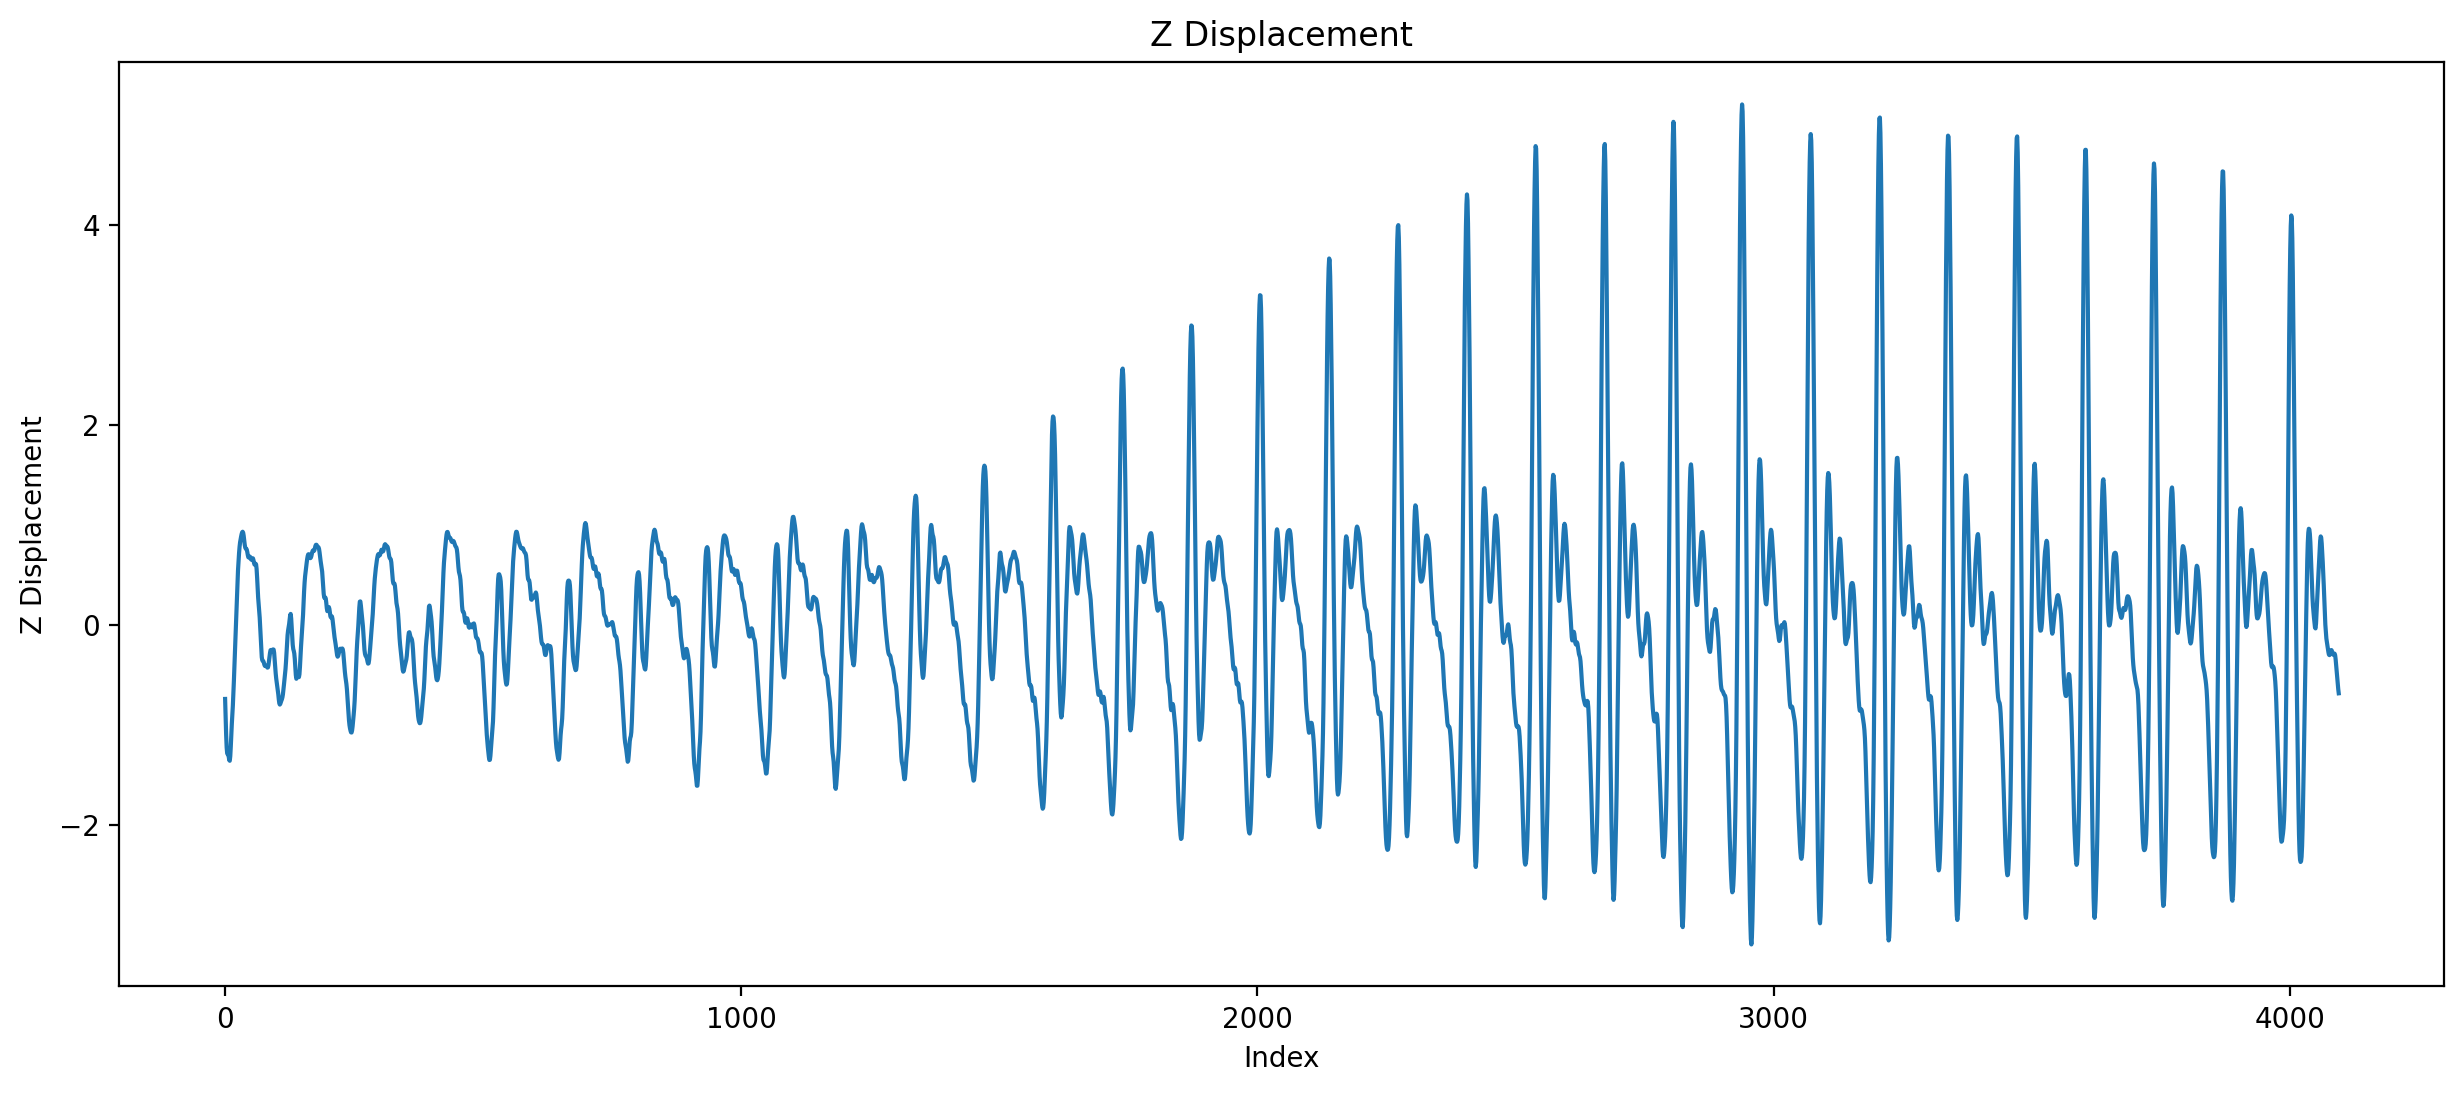

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

for col in df.columns[1:]:
    plt.figure()
    df[col].plot(title=col)
    
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()


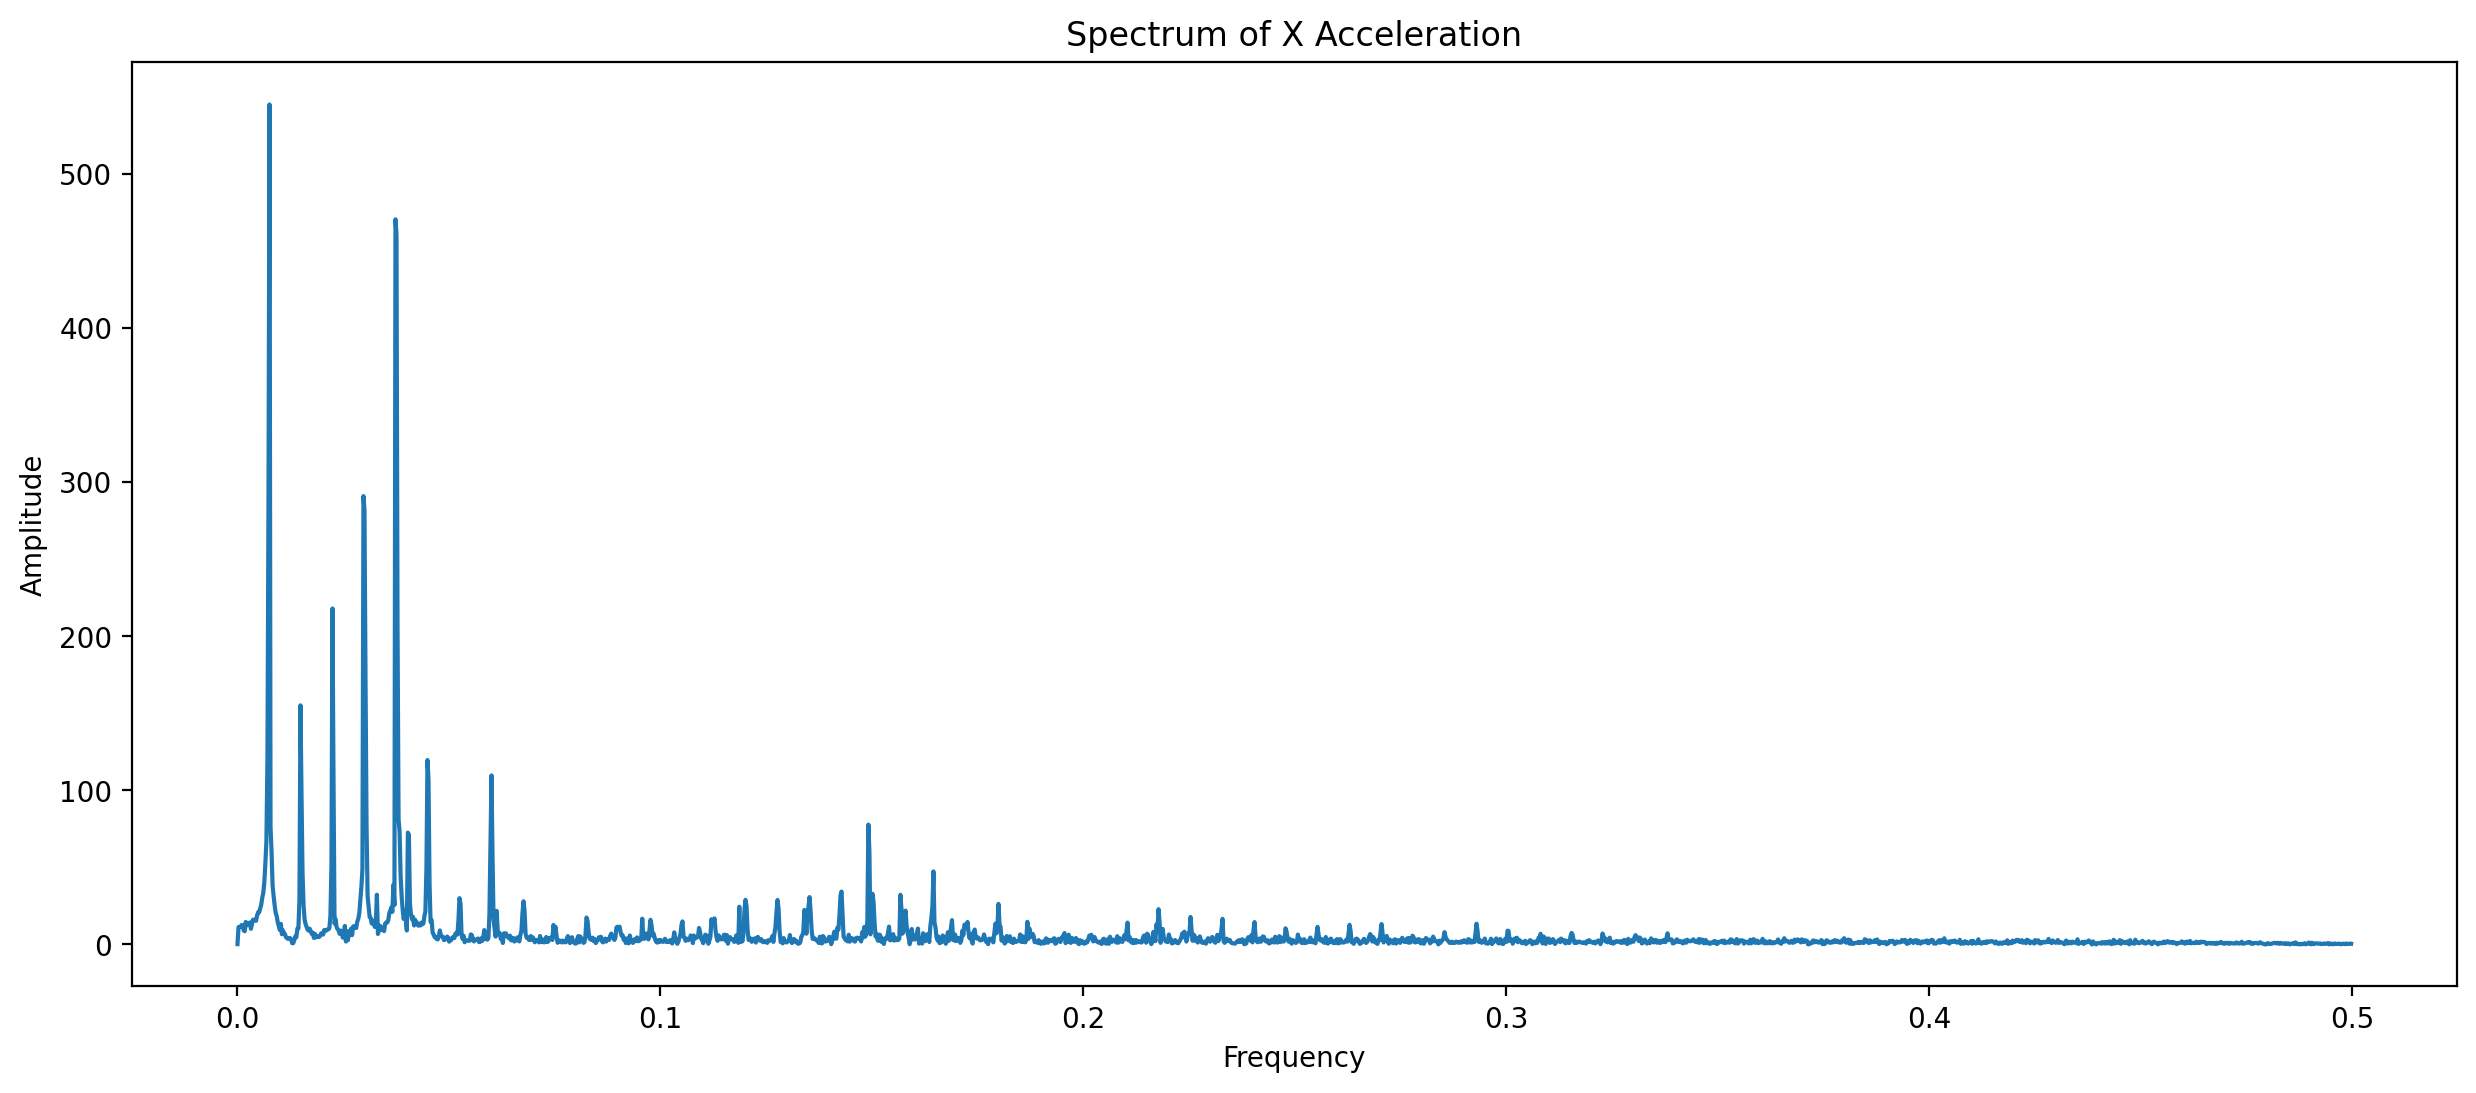

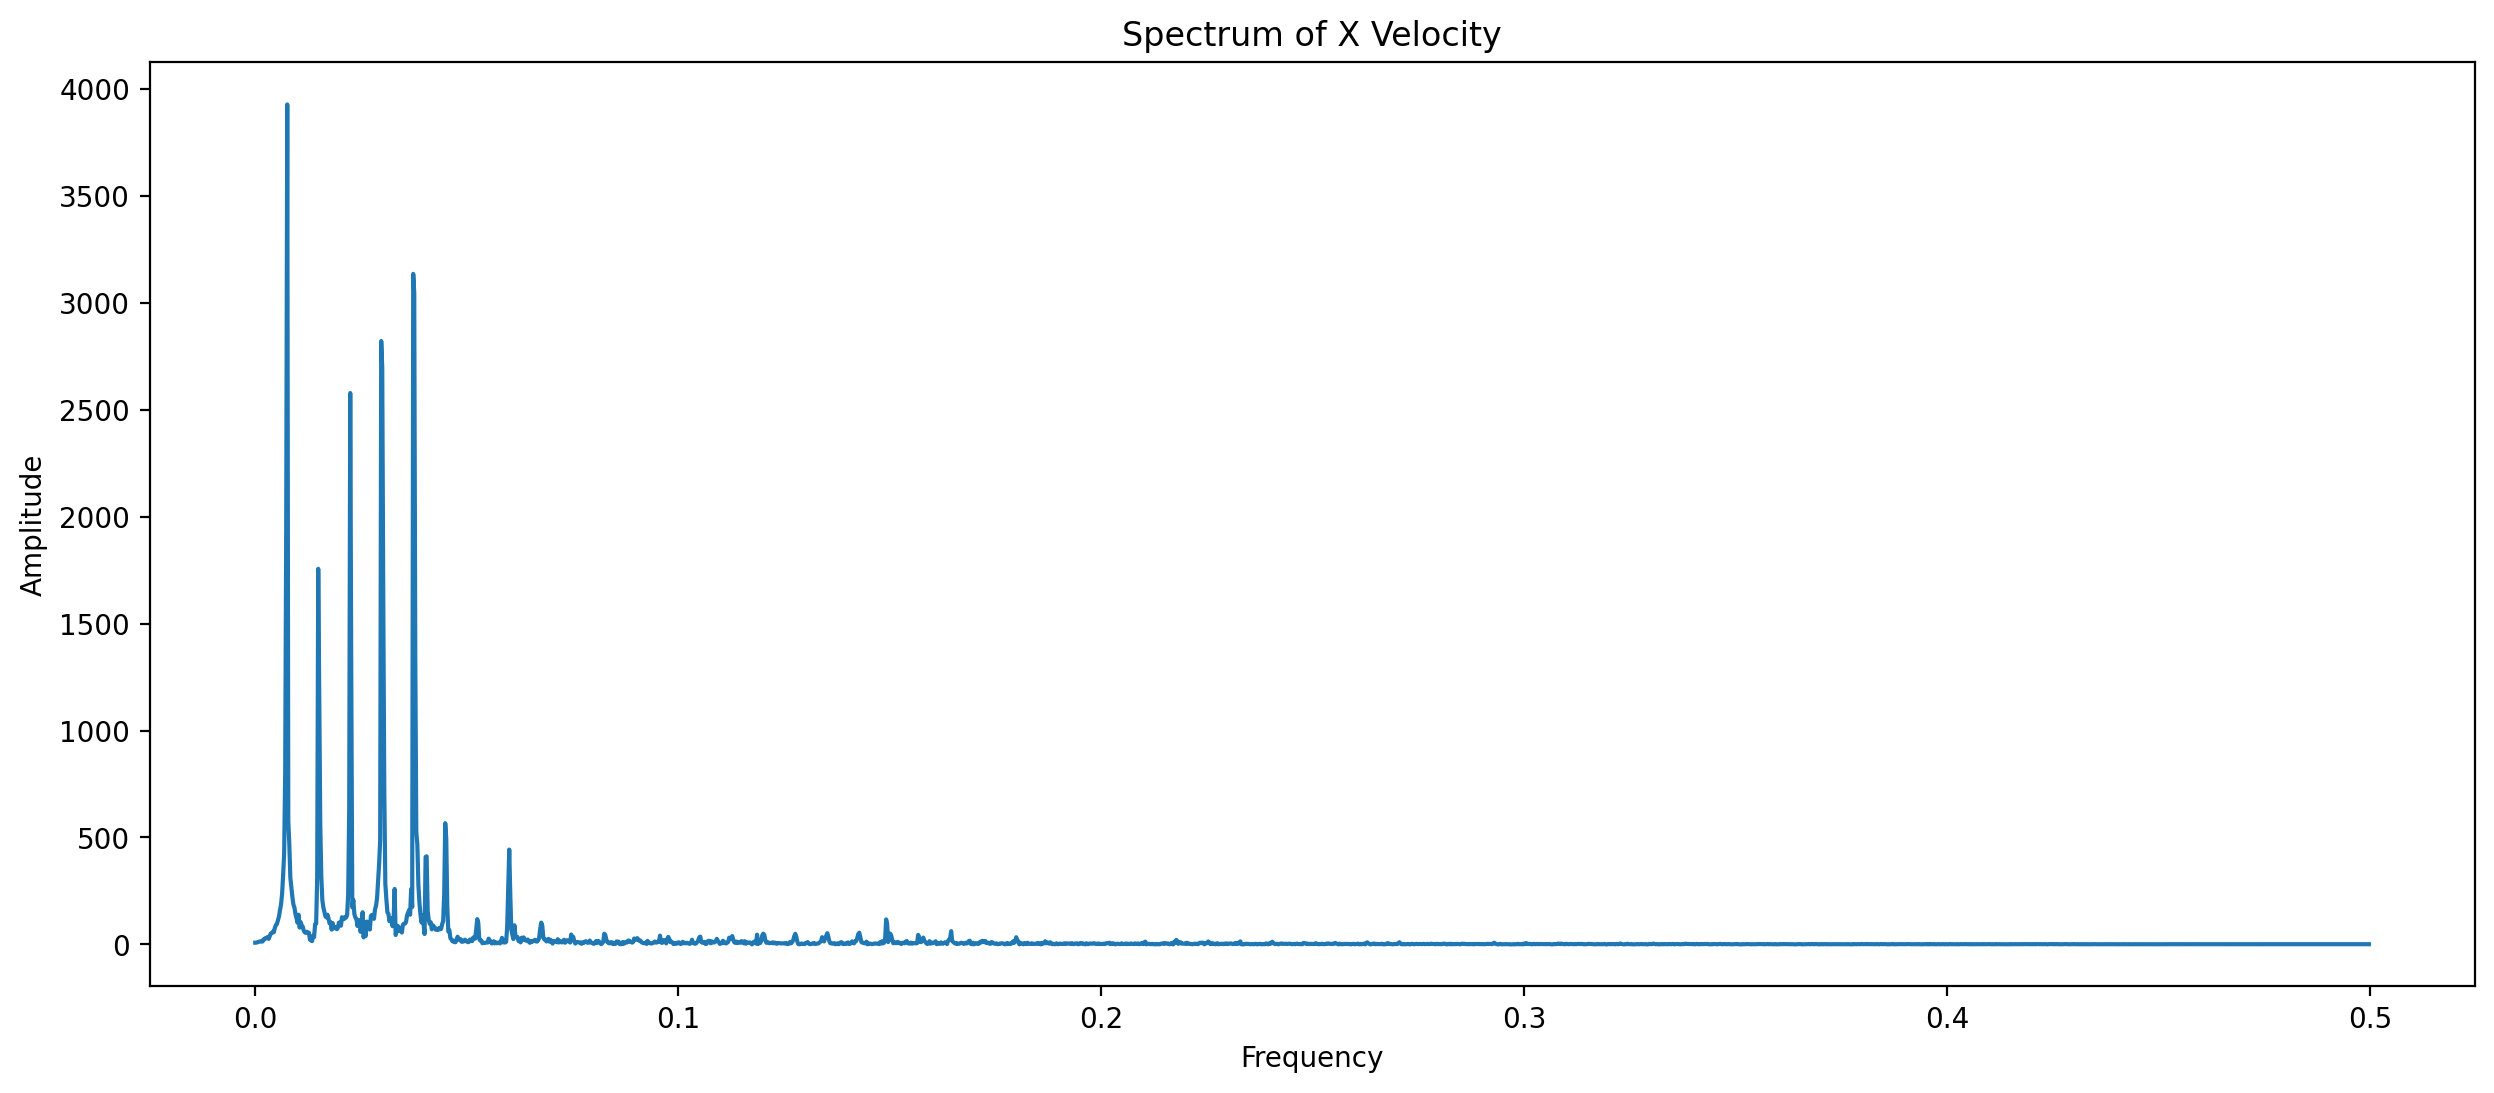

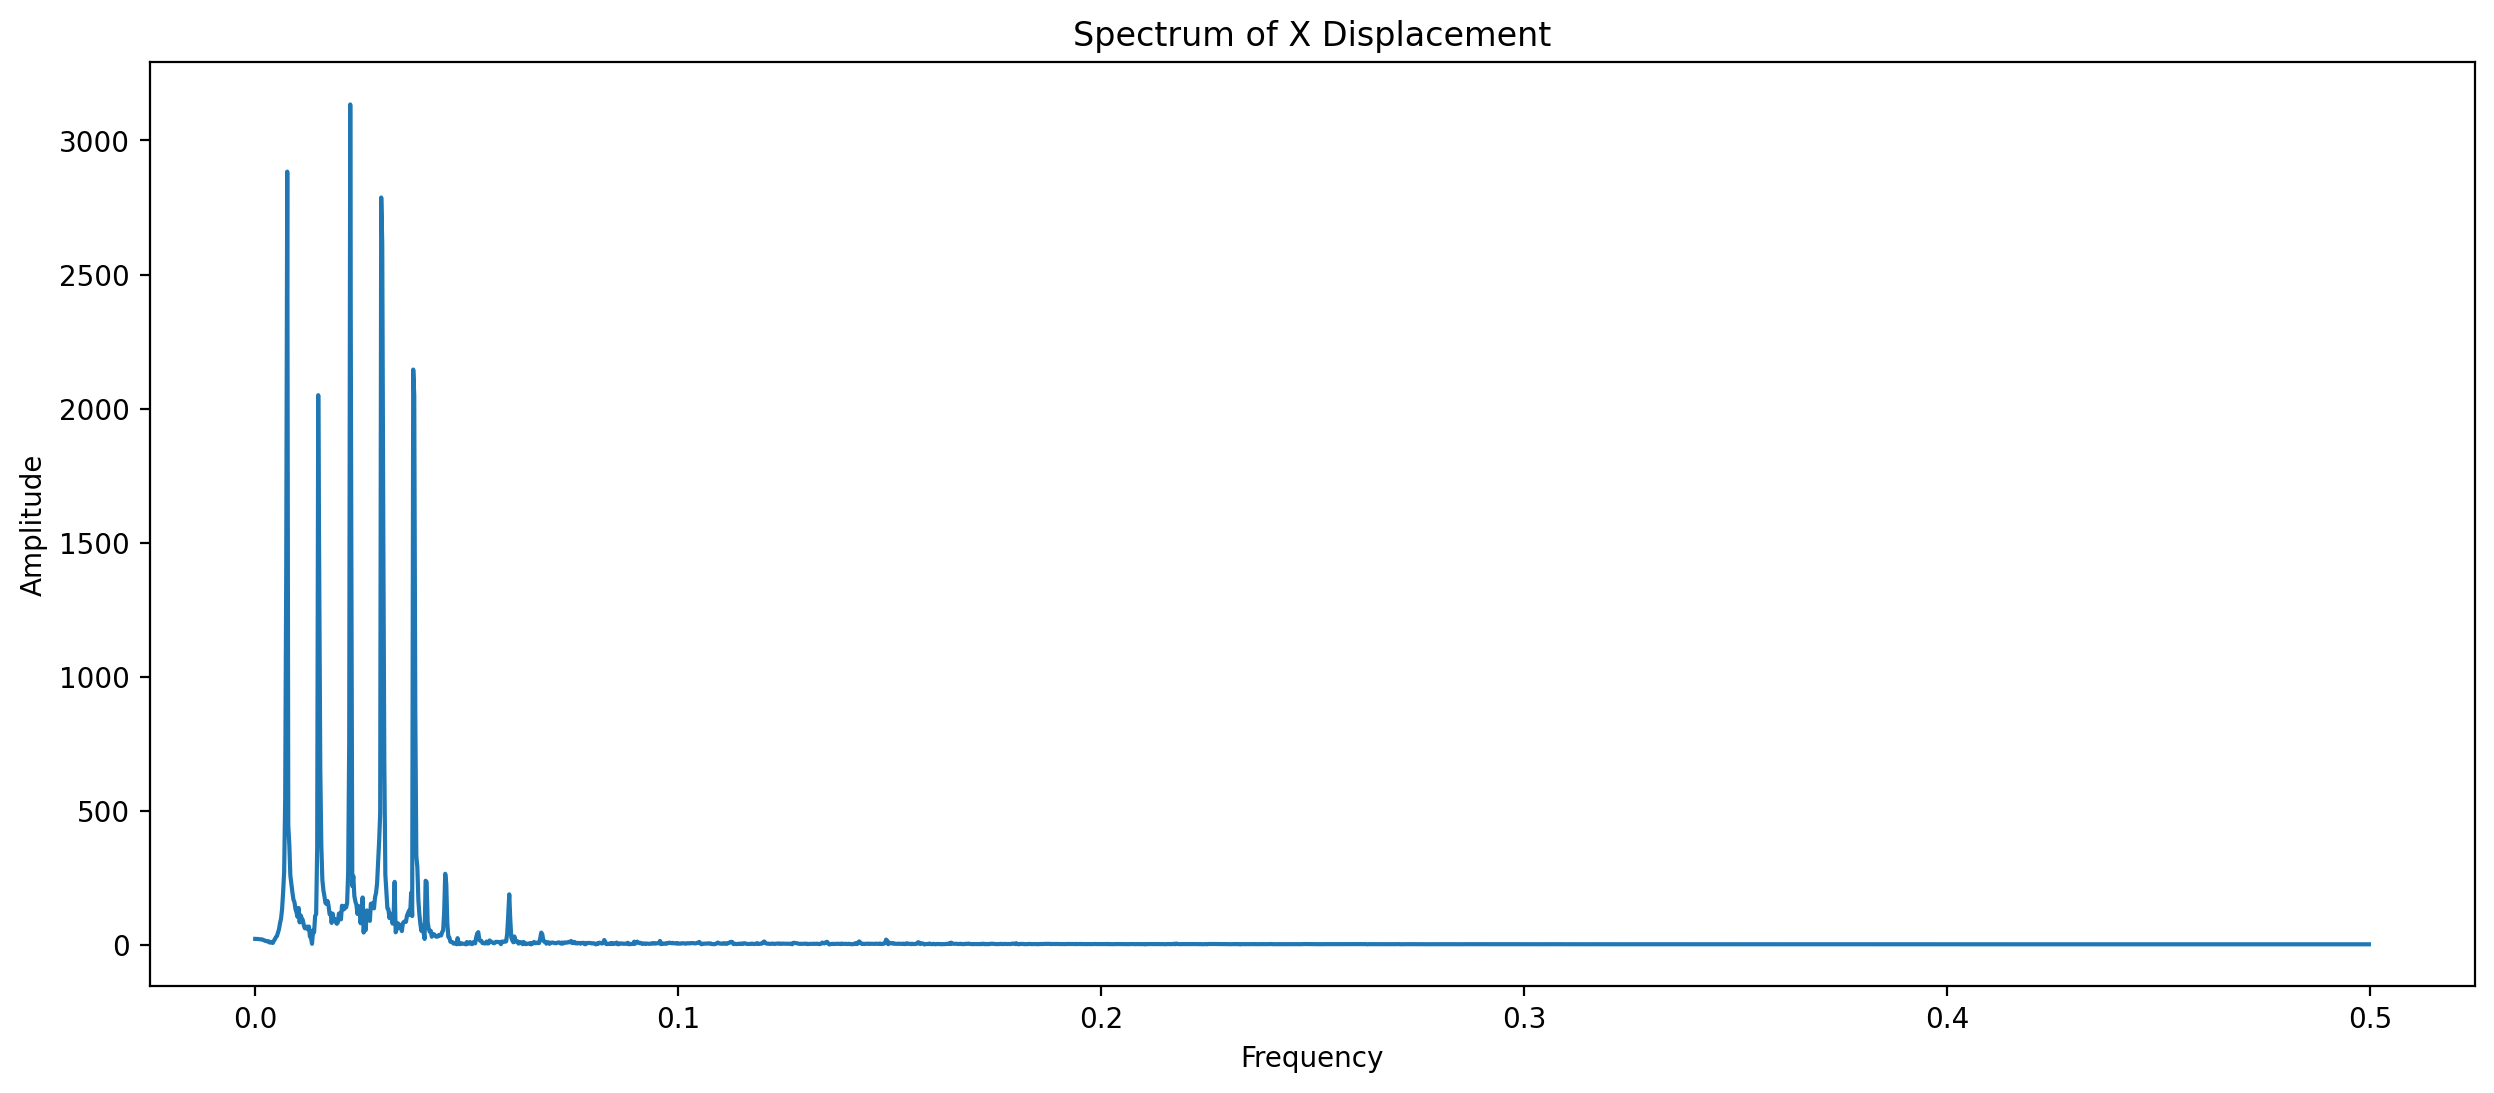

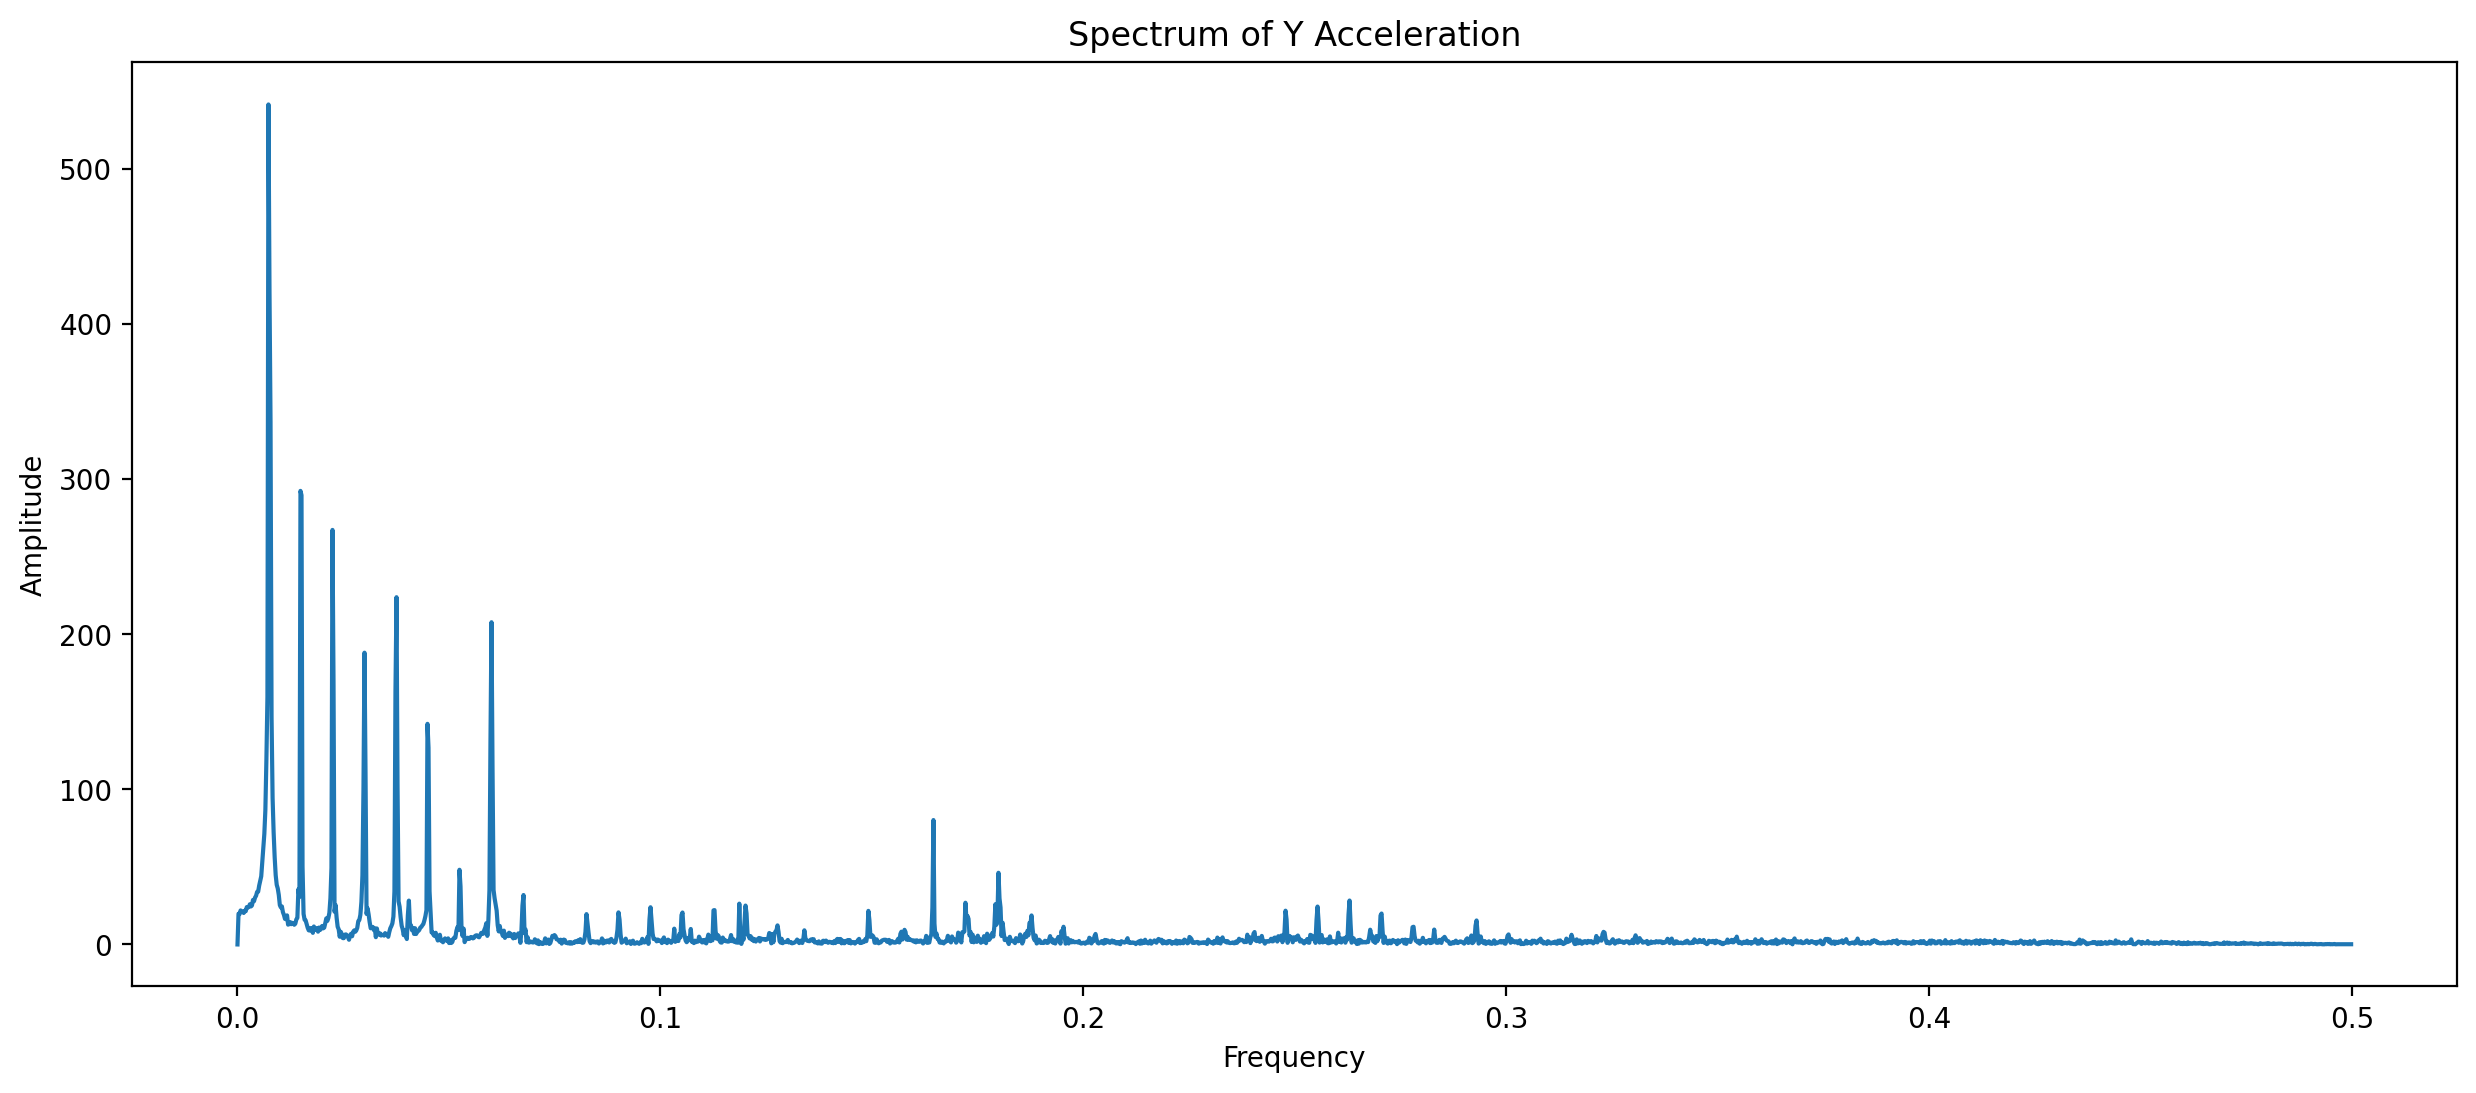

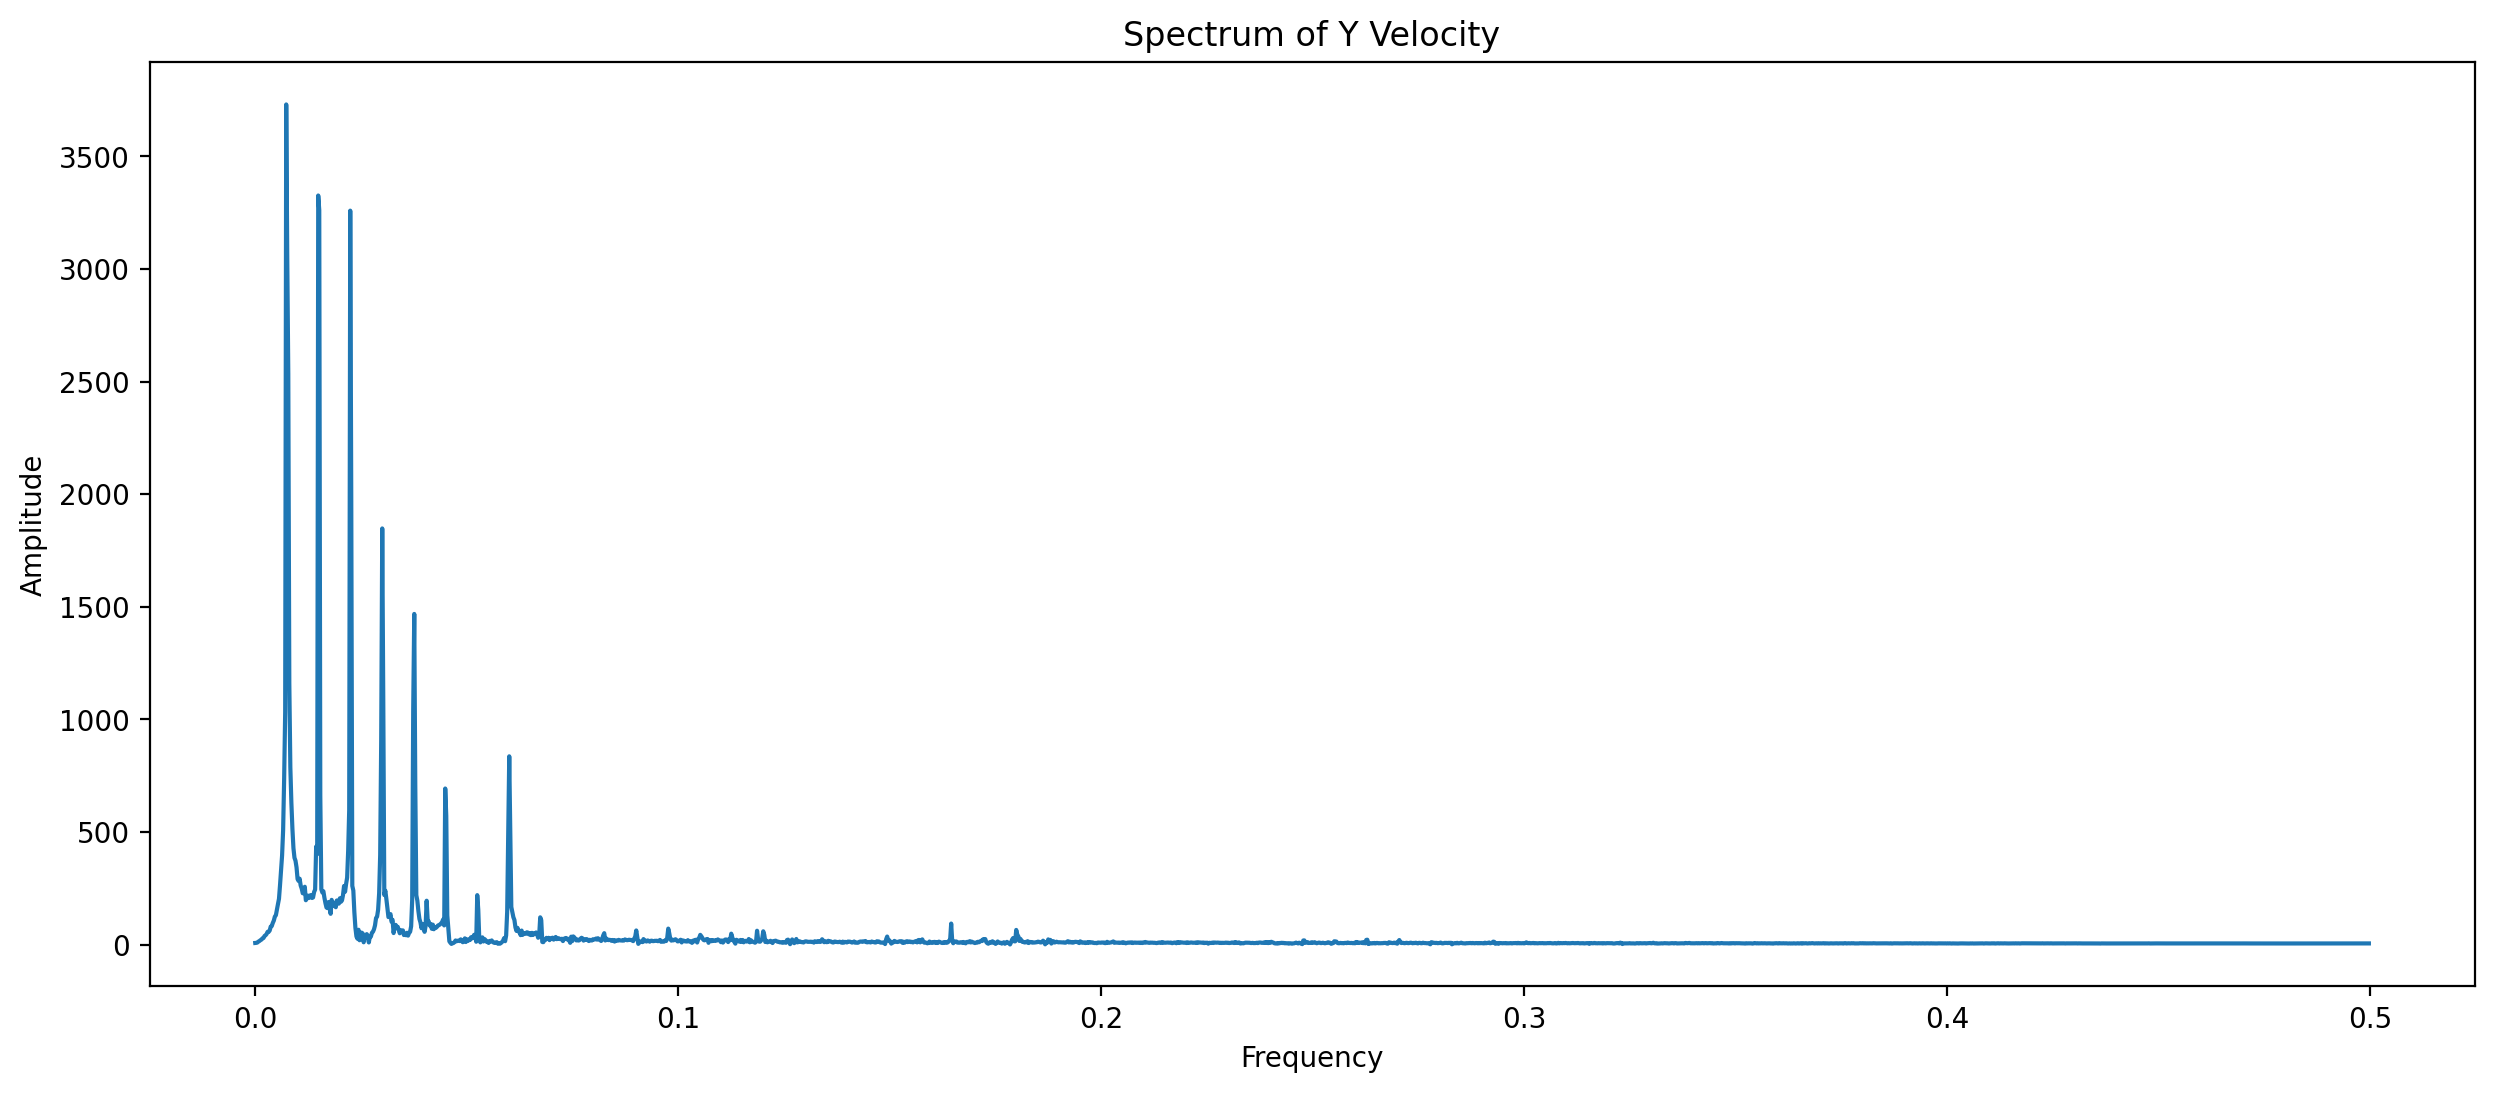

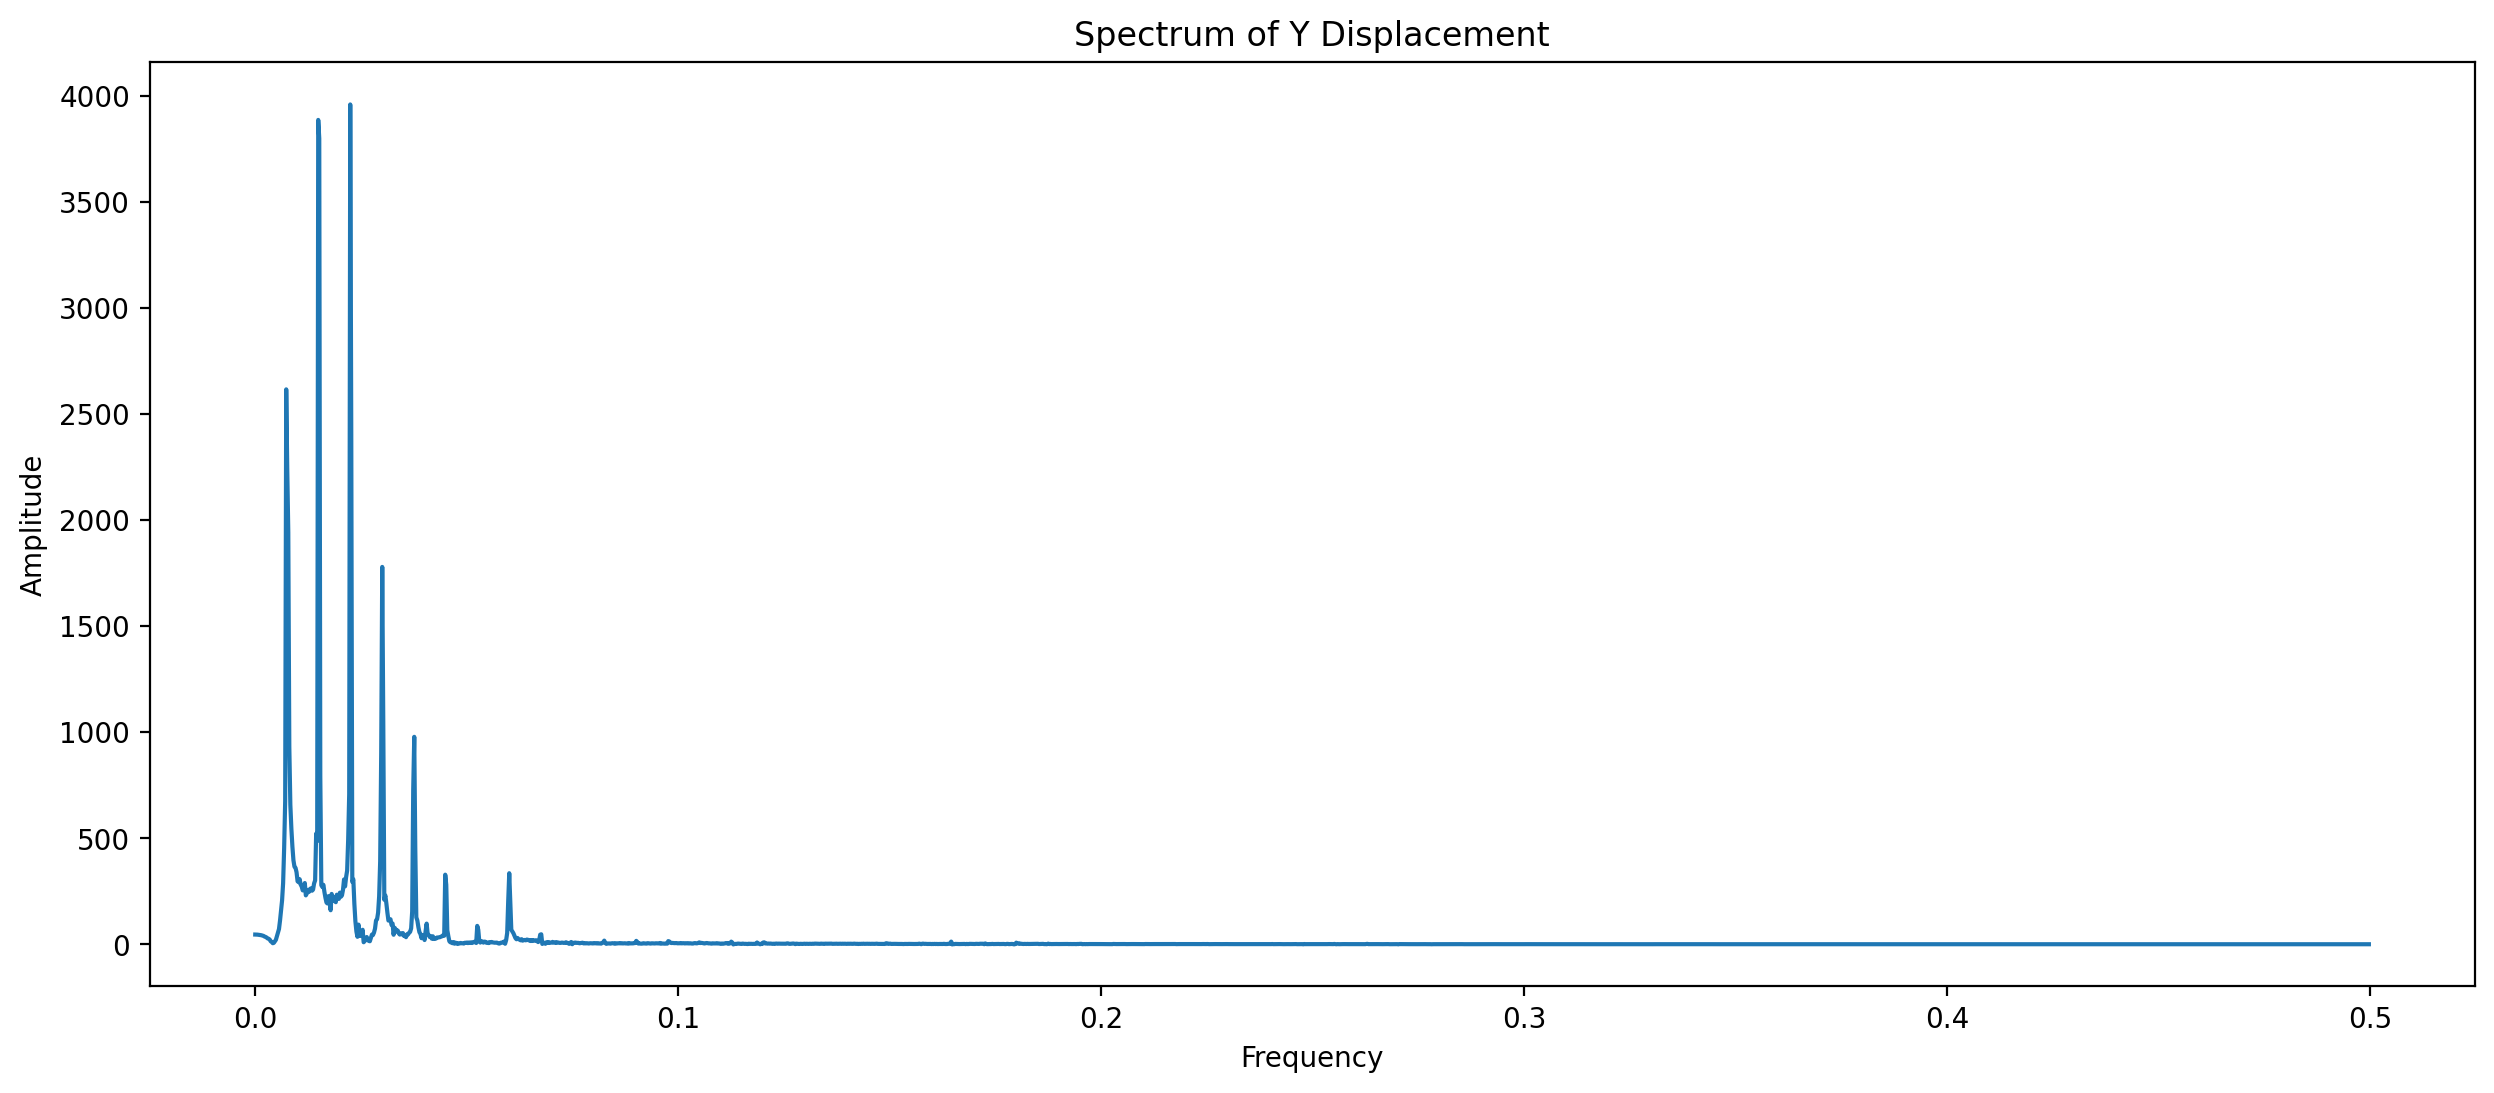

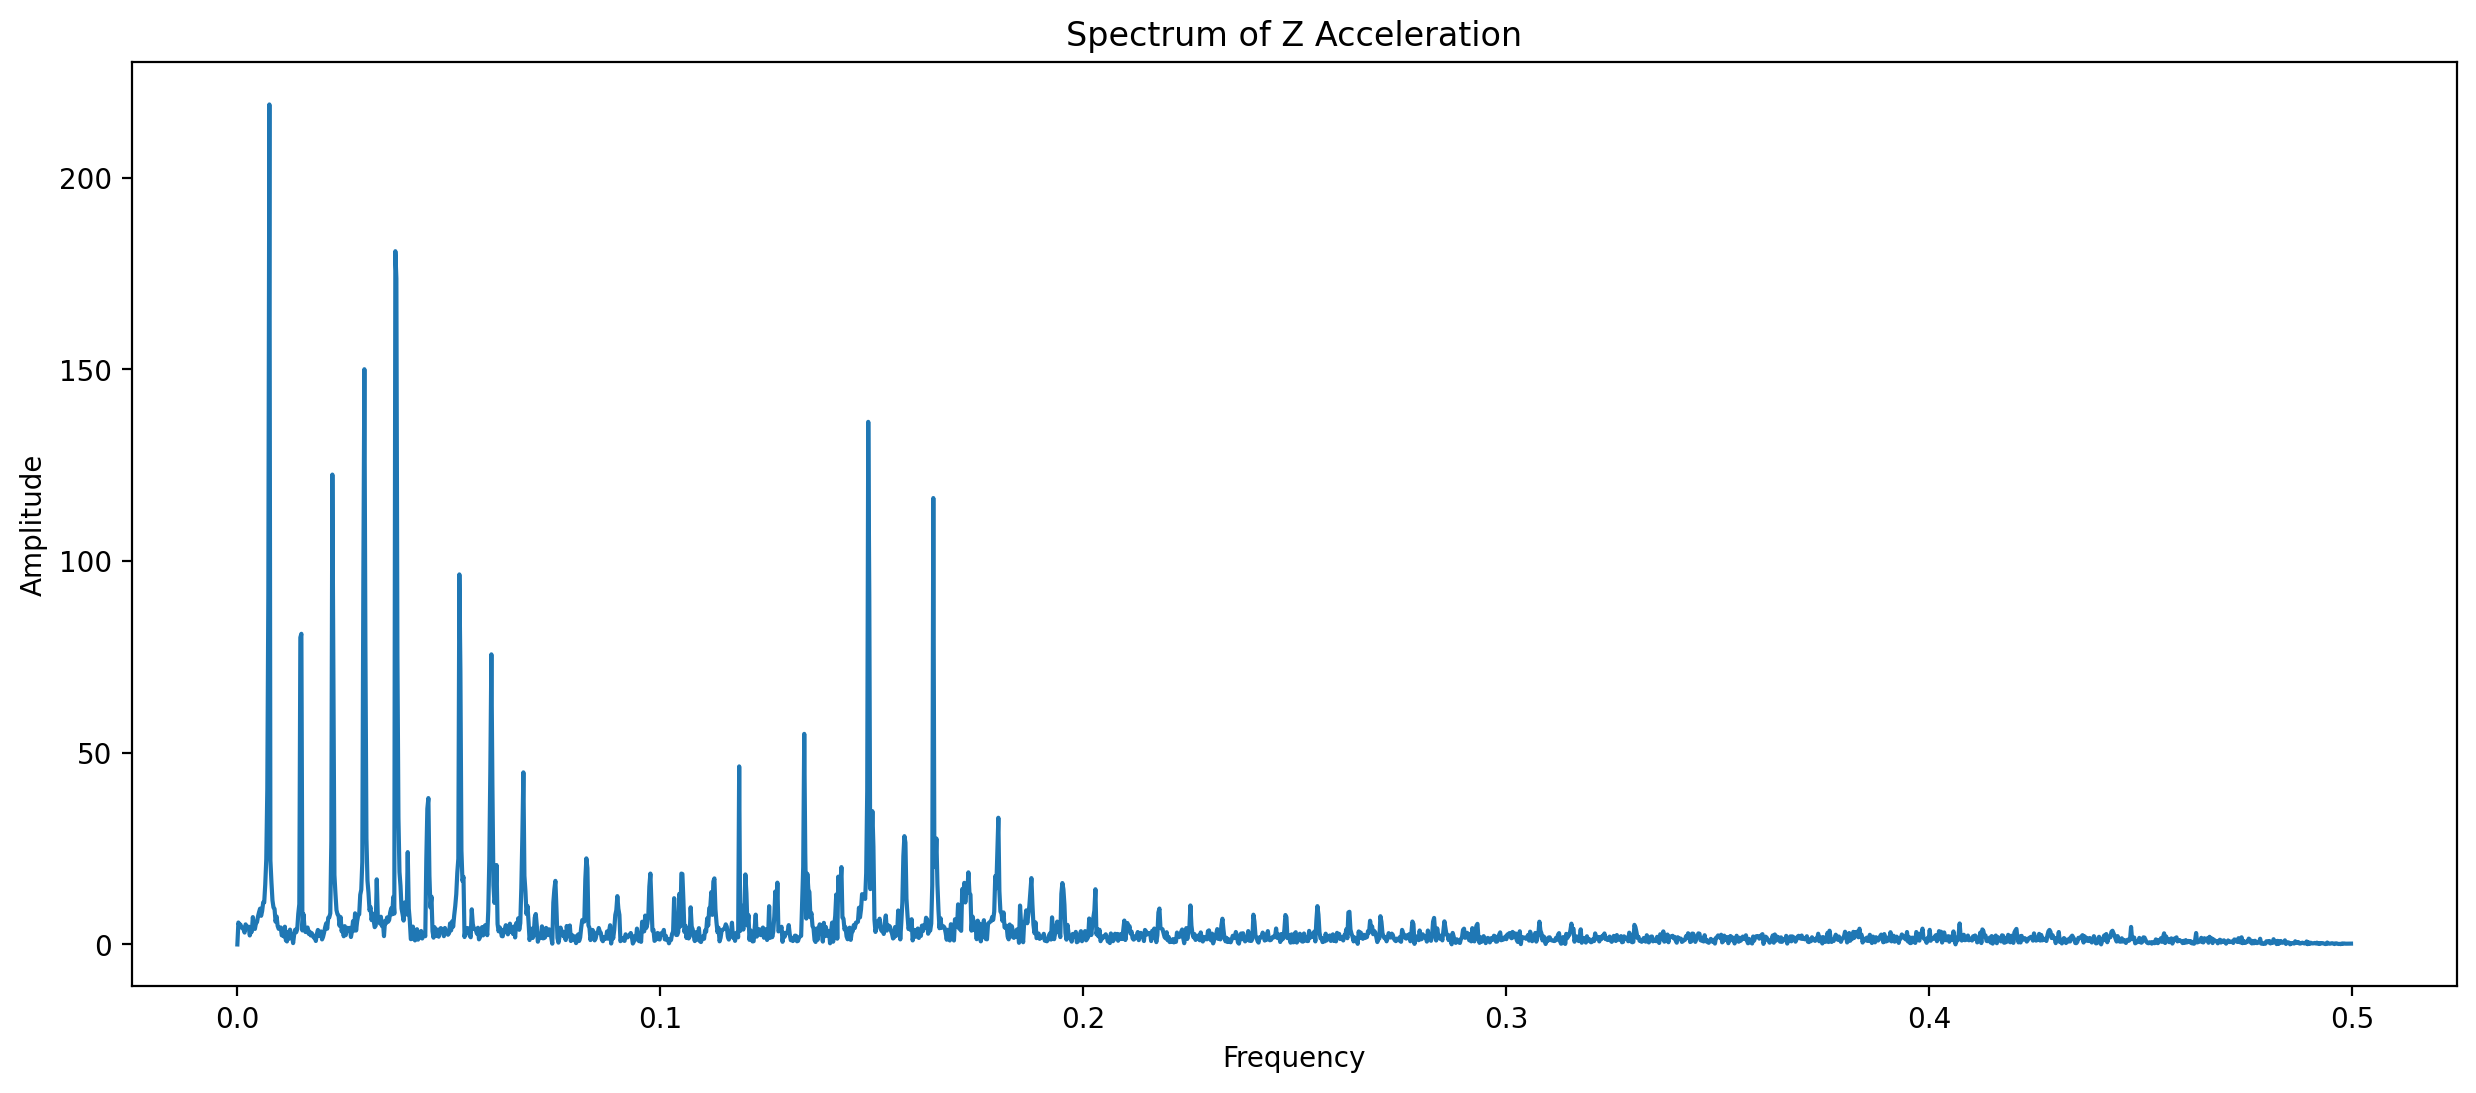

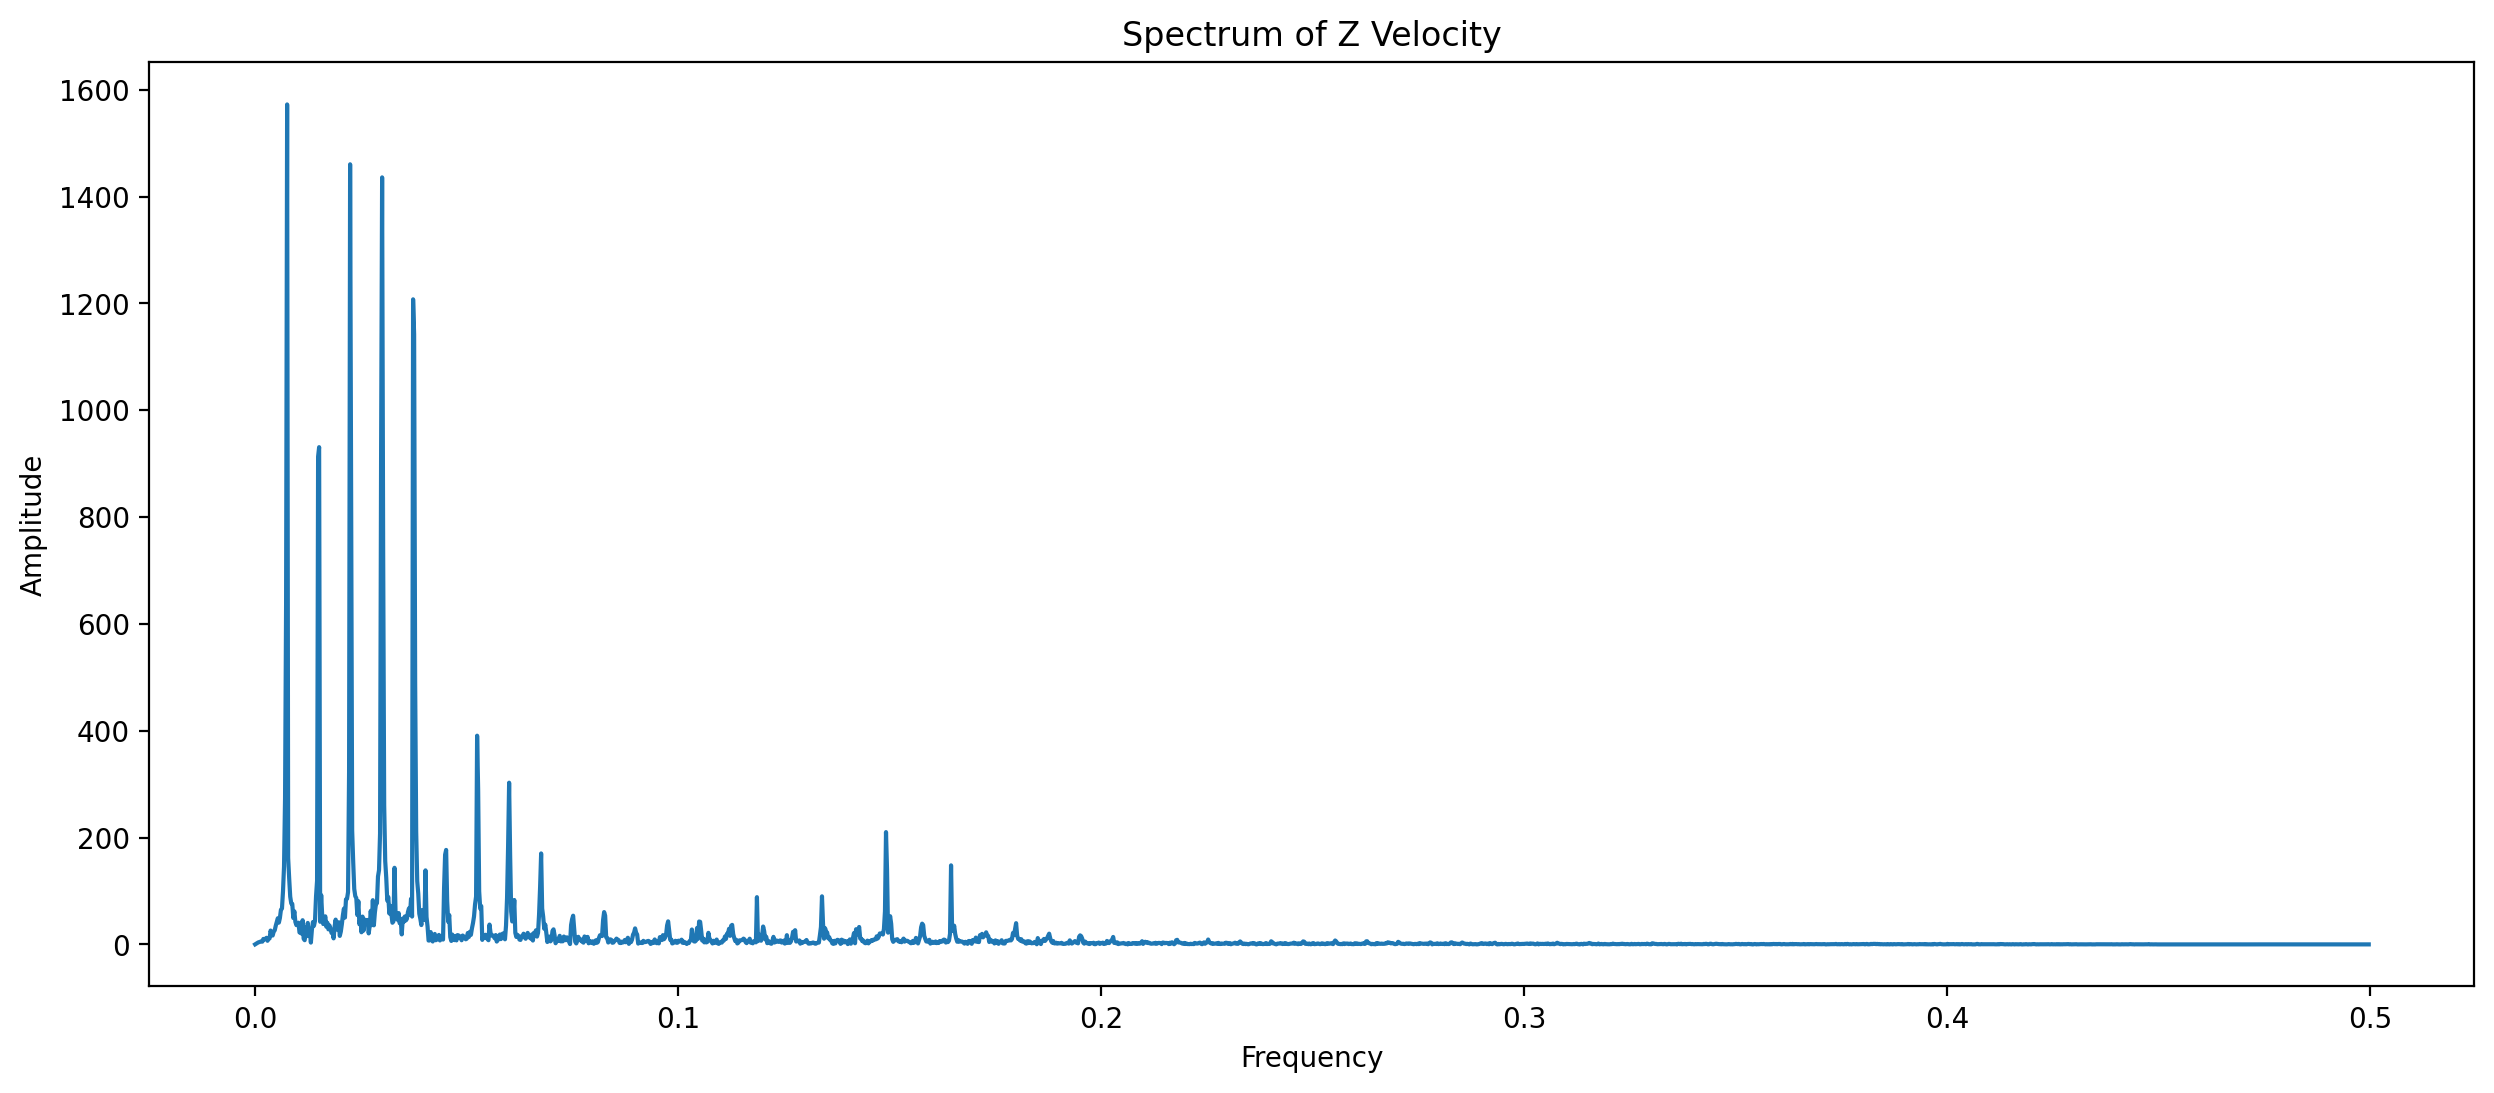

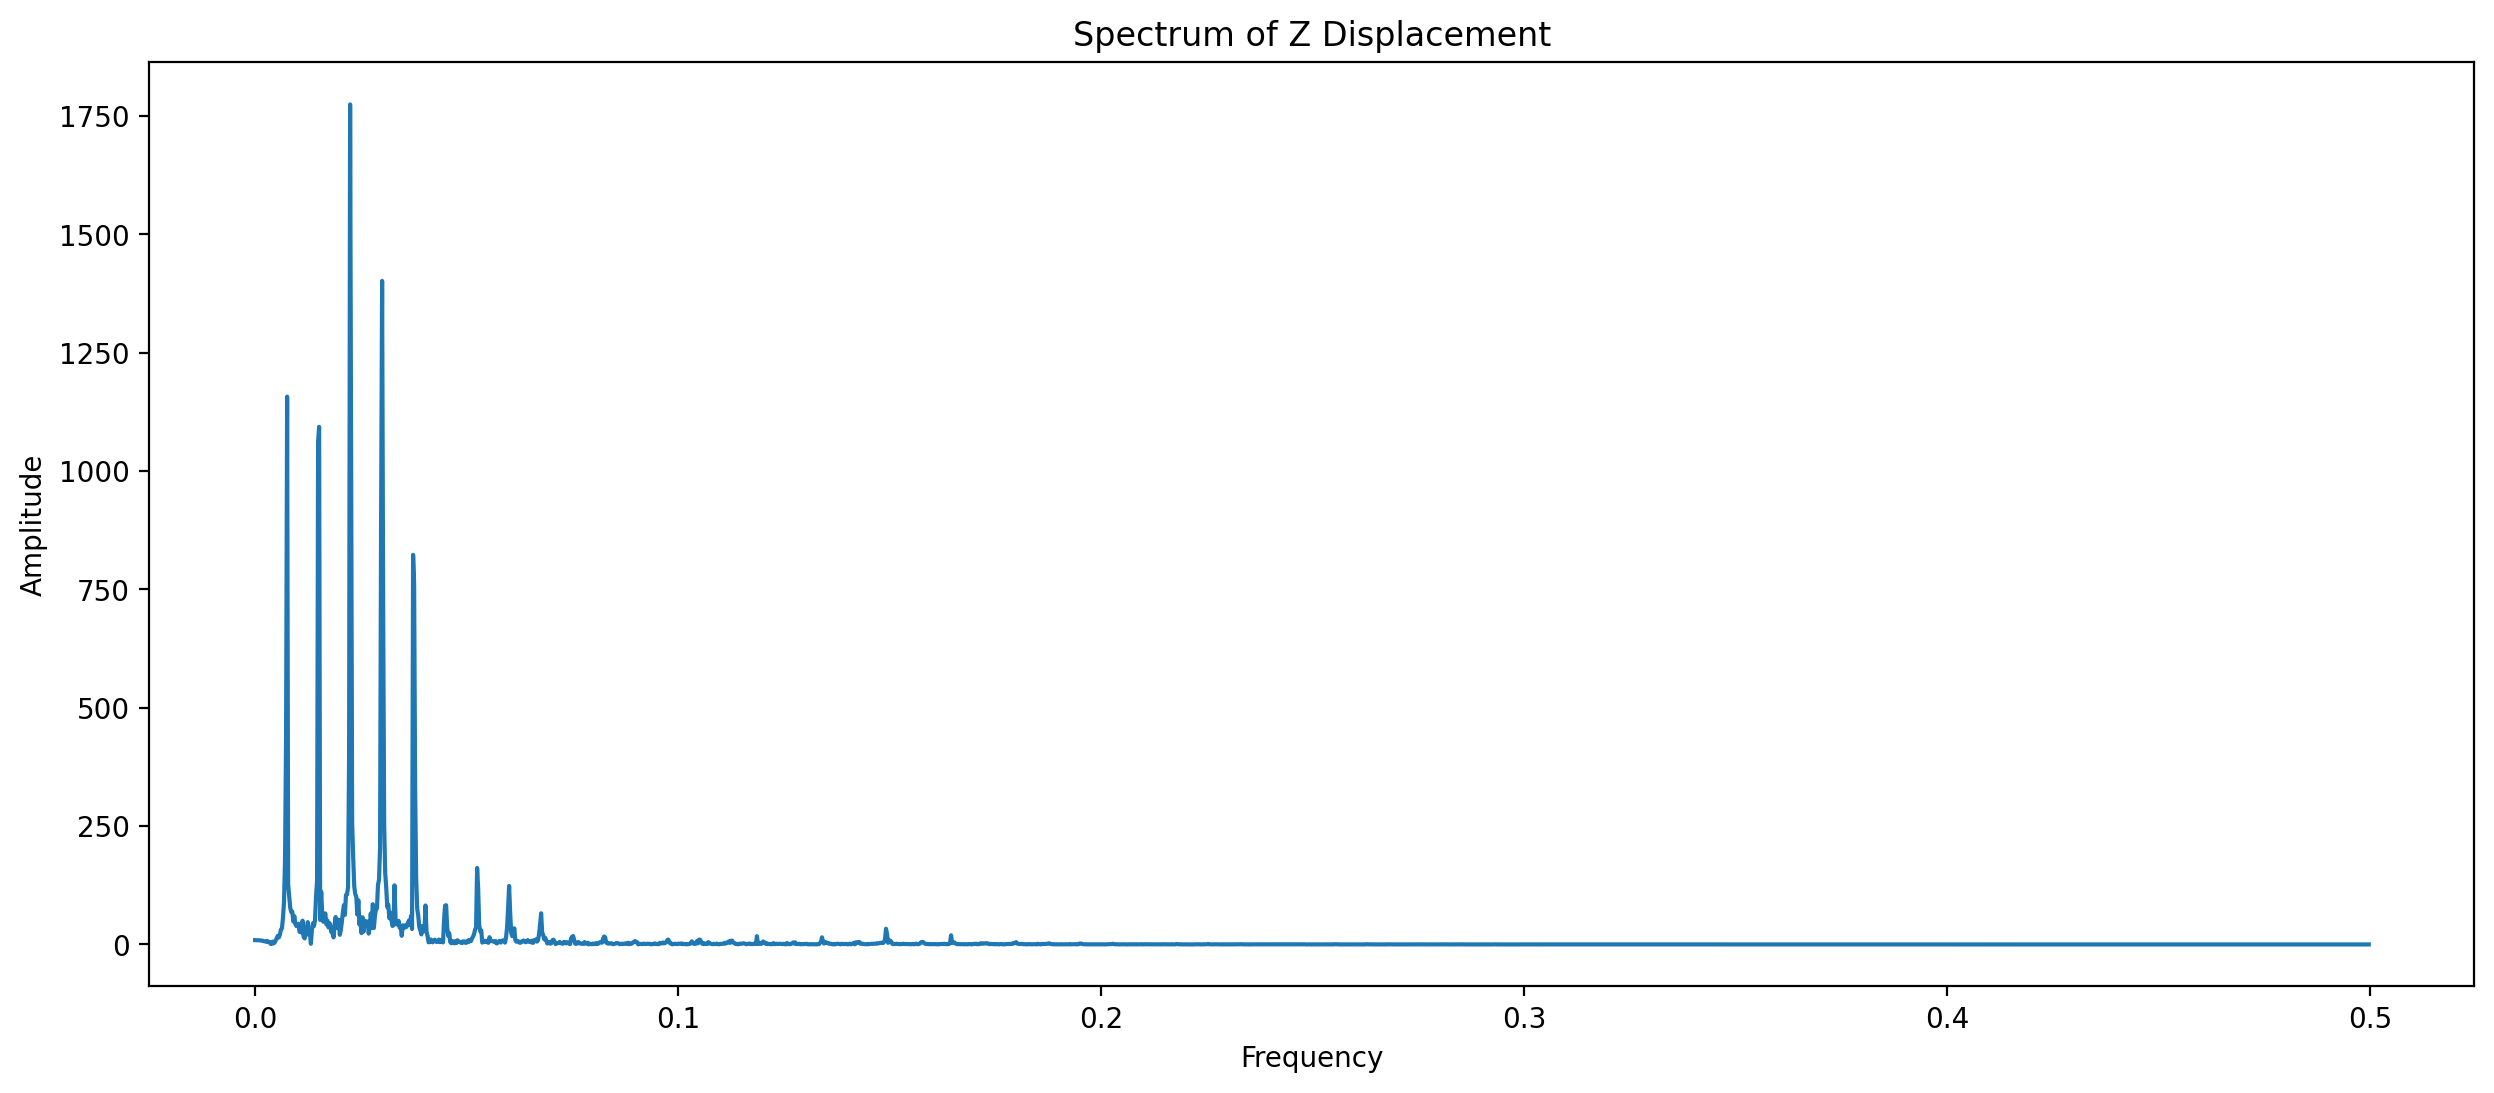

In [21]:
for col in df.columns[1:]:
    plt.figure()
    
    # คำนวณสเปกตรัมโดยใช้ Fast Fourier Transform (FFT)
    spectrum = np.fft.fft(df[col])
    
    # คำนวณความถี่ที่เกี่ยวข้อง
    freq = np.fft.fftfreq(len(df[col]))

    
    # สร้างกราฟสเปกตรัม
    plt.plot(freq[:len(freq) // 2], np.abs(spectrum)[:len(freq) // 2 ])
    plt.title(f'Spectrum of {col}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.show()